## –û–±–∑–æ—Ä –¥–∞–Ω–Ω—ã—Ö –∏ –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞

In [1]:
# –∏–º–ø–æ—Ä—Ç –±–∏–±–ª–∏–æ—Ç–µ–∫
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import datetime
import time
import requests 
from urllib.parse import urlencode
import sys
from scipy import stats as st
np.set_printoptions(threshold=sys.maxsize)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

### –ó–Ω–∞–∫–æ–º—Å—Ç–≤–æ —Å –¥–∞–Ω–Ω—ã–º–∏

---
–ó–∞–≥—Ä—É–∑–∏–º —Ç–∞–±–ª–∏—Ü—É –∏–∑ —Ñ–∞–π–ª–∞ `telecom_clients.csv`:

In [2]:
# –∏—Å–ø–æ–ª—å–∑—É–µ–º api 
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?' 
public_key = 'https://yadi.sk/d/qDyw04TLVP4CiA' 
 
# –ø–æ–ª—É—á–∞–µ–º url 
final_url = base_url + urlencode(dict(public_key=public_key)) 
response = requests.get(final_url) 
download_url_cl = response.json()['href'] 
 
# –∑–∞–≥—Ä—É–∂–∞–µ–º —Ñ–∞–π–ª –≤ df 
download_response = requests.get(download_url_cl) 
date_parser = lambda x: pd.to_datetime(x)
clients = pd.read_csv(download_url_cl, parse_dates=['date_start'], date_parser=date_parser)

# –≤—ã–≤–æ–¥–∏–º 5 —Å—Ç—Ä–æ–∫ –¥–ª—è –æ–∑–Ω–∞–∫–æ–º–ª–µ–Ω–∏—è
clients.head()

user_id tariff_plan date_start
0   166713           A 2019-08-15
1   166901           A 2019-08-23
2   168527           A 2019-10-29
3   167097           A 2019-09-01
4   168193           A 2019-10-16

In [3]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      732 non-null    int64         
 1   tariff_plan  732 non-null    object        
 2   date_start   732 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 17.3+ KB


–í —Ç–∞–±–ª–∏—Ü–µ 3 —Å—Ç–æ–ª–±—Ü–∞ –∏ 732 —Å—Ç—Ä–æ–∫–∏, —Ç–∏–ø—ã –¥–∞–Ω–Ω—ã—Ö (–ø–æ —Å—Ç–æ–ª–±—Ü–∞–º): `datetime64[ns]`(1), `int64`(1), `object`(1).

–û–ø–∏—Å–∞–Ω–∏–µ —Å—Ç–æ–ª–±—Ü–æ–≤:
- `user_id`¬†‚Äî –∏–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ç–æ—Ä –∫–ª–∏–µ–Ω—Ç—Å–∫–æ–≥–æ –∞–∫–∫–∞—É–Ω—Ç–∞ (–∫–æ–ª–ª-—Ü–µ–Ω—Ç—Ä–∞) –≤ —Å–µ—Ä–≤–∏—Å–µ;
- `tariff_plan`¬†‚Äî —Ç–µ–∫—É—â–∏–π —Ç–∞—Ä–∏—Ñ–Ω—ã–π –ø–ª–∞–Ω –∫–ª–∏–µ–Ω—Ç–∞;
- `date_start`¬†‚Äî –¥–∞—Ç–∞ —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–∏ –∫–ª–∏–µ–Ω—Ç–∞ –≤ —Å–µ—Ä–≤–∏—Å–µ.

<div style="border:solid green 1px; padding: 10px">

–ù–∞–∑–≤–∞–Ω–∏—è —Å—Ç–æ–ª–±—Ü–æ–≤ –≤ –æ–¥–Ω–æ–º —Ä–µ–≥–∏—Å—Ç—Ä–µ –∏ —Å—Ç–∏–ª–µ. 
–ü—Ä–æ–ø—É—Å–∫–æ–≤ –≤ –¥–∞–Ω–Ω—ã—Ö –Ω–µ—Ç. –ü—Ä–æ–≤–µ—Ä–∏–º –¥–∞–Ω–Ω—ã–µ –Ω–∞ –¥—É–±–ª–∏–∫–∞—Ç—ã.

---
–ó–∞–≥—Ä—É–∑–∏–º —Ç–∞–±–ª–∏—Ü—É –∏–∑ —Ñ–∞–π–ª–∞ `telecom_dataset.csv`:

In [4]:
# –∏—Å–ø–æ–ª—å–∑—É–µ–º api 
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?' 
public_key = 'https://yadi.sk/d/Z6Q6KHy2I_WwCA' 

# –ø–æ–ª—É—á–∞–µ–º url 
final_url = base_url + urlencode(dict(public_key=public_key)) 
response = requests.get(final_url) 
download_url = response.json()['href'] 
download_response = requests.get(download_url) 

In [5]:
# –∑–∞–≥—Ä—É–∂–∞–µ–º —Ñ–∞–π–ª –≤ df 
df = pd.read_csv(download_url, parse_dates=['date'], date_parser=date_parser)

# –≤—ã–≤–æ–¥–∏–º 5 —Å—Ç—Ä–æ–∫ –¥–ª—è –æ–∑–Ω–∞–∫–æ–º–ª–µ–Ω–∏—è
df.head()

user_id                      date direction internal  operator_id  \
0   166377 2019-08-04 00:00:00+03:00        in    False          NaN   
1   166377 2019-08-05 00:00:00+03:00       out     True     880022.0   
2   166377 2019-08-05 00:00:00+03:00       out     True     880020.0   
3   166377 2019-08-05 00:00:00+03:00       out     True     880020.0   
4   166377 2019-08-05 00:00:00+03:00       out    False     880022.0   

   is_missed_call  calls_count  call_duration  total_call_duration  
0            True            2              0                    4  
1            True            3              0                    5  
2            True            1              0                    1  
3           False            1             10                   18  
4            True            3              0                   25

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype                                
---  ------               --------------  -----                                
 0   user_id              53902 non-null  int64                                
 1   date                 53902 non-null  datetime64[ns, pytz.FixedOffset(180)]
 2   direction            53902 non-null  object                               
 3   internal             53785 non-null  object                               
 4   operator_id          45730 non-null  float64                              
 5   is_missed_call       53902 non-null  bool                                 
 6   calls_count          53902 non-null  int64                                
 7   call_duration        53902 non-null  int64                                
 8   total_call_duration  53902 non-null  int64                                
dtypes: bool

–í —Ç–∞–±–ª–∏—Ü–µ 9 —Å—Ç–æ–ª–±—Ü–æ–≤ –∏ 53902 —Å—Ç—Ä–æ–∫, —Ç–∏–ø—ã –¥–∞–Ω–Ω—ã—Ö (–ø–æ —Å—Ç–æ–ª–±—Ü–∞–º): `bool`(1), `datetime64[ns, pytz.FixedOffset(180)]`(1), `float64`(1), `int64`(4), `object`(2).

–û–ø–∏—Å–∞–Ω–∏–µ —Å—Ç–æ–ª–±—Ü–æ–≤:
- `user_id`¬†‚Äî –∏–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ç–æ—Ä –∫–ª–∏–µ–Ω—Ç—Å–∫–æ–≥–æ –∞–∫–∫–∞—É–Ω—Ç–∞ (–∫–æ–ª–ª-—Ü–µ–Ω—Ç—Ä–∞) –≤ —Å–µ—Ä–≤–∏—Å–µ;
- `date`¬†‚Äî –¥–∞—Ç–∞ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏;
- `direction`¬†‚Äî –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏–µ –≤—ã–∑–æ–≤–æ–≤ (`out` - –∏—Å—Ö–æ–¥—è—â–∏–π –≤—ã–∑–æ–≤, `in` ‚Äî –≤—Ö–æ–¥—è—â–∏–π –≤—ã–∑–æ–≤);
- `internal`¬†‚Äî —è–≤–ª—è–µ—Ç—Å—è –ª–∏ –∑–≤–æ–Ω–æ–∫ –≤–Ω—É—Ç—Ä–µ–Ω–Ω–∏–º –∑–≤–æ–Ω–∫–æ–º –º–µ–∂–¥—É –æ–ø–µ—Ä–∞—Ç–æ—Ä–∞–º–∏ –∫–ª–∏–µ–Ω—Ç–∞;
- `operator_id`¬†‚Äî –∏–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ç–æ—Ä –æ–ø–µ—Ä–∞—Ç–æ—Ä–∞;
- `is_missed_call`¬†‚Äî —è–ª—è–µ—Ç—Å—è –ª–∏ –∑–≤–æ–Ω–æ–∫ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–º;
- `calls_count`¬†‚Äî –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–≤–æ–Ω–∫–æ–≤;
- `call_duration`¬†‚Äî –¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å –∑–≤–æ–Ω–∫–∞ –≤ —Å–µ–∫—É–Ω–¥–∞—Ö (–±–µ–∑ —É—á–µ—Ç–∞ –≤—Ä–µ–º–µ–Ω–∏ –æ–∂–∏–¥–∞–Ω–∏—è);
- `total_call_duration`¬†‚Äî –¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å –∑–≤–æ–Ω–∫–∞ –≤ —Å–µ–∫—É–Ω–¥–∞—Ö (—Å —É—á–µ—Ç–æ–º –≤—Ä–µ–º–µ–Ω–∏ –æ–∂–∏–¥–∞–Ω–∏—è).

<div style="border:solid green 1px; padding: 10px">

–ù–∞–∑–≤–∞–Ω–∏—è —Å—Ç–æ–ª–±—Ü–æ–≤ –≤ –æ–¥–Ω–æ–º —Ä–µ–≥–∏—Å—Ç—Ä–µ –∏ —Å—Ç–∏–ª–µ. –¢–∏–ø—ã –¥–∞–Ω–Ω—ã—Ö –Ω–µ –≤–µ–∑–¥–µ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—Ç —Å–æ–¥–µ—Ä–∂–∞–Ω–∏—é, —Ç–∞–∫ —Å—Ç–æ–ª–±–µ—Ü `date` —Ö—Ä–∞–Ω–∏—Ç—Å—è —Å —Ç–∏–ø–æ–º –¥–∞–Ω–Ω—ã—Ö `datetime64[ns, pytz.FixedOffset(180)], –ª–æ–≥–∏—á–Ω–µ–µ –ø–µ—Ä–µ–≤–µ—Å—Ç–∏ –µ–≥–æ –≤ `datetime64[ns]`, —Å—Ç–æ–ª–±–µ—Ü `internal`–ª–æ–≥–∏—á–Ω–µ–µ –ø–µ—Ä–µ–≤–µ—Å—Ç–∏ –∏–∑ `object` –≤ `bool`, —Å—Ç–æ–ª–±–µ—Ü `operator_id` –ª–æ–≥–∏—á–Ω–µ–µ –ø–µ—Ä–µ–≤–µ—Å—Ç–∏ –≤ `int`.
    
–í —Å—Ç–æ–ª–±—Ü–∞—Ö `call_duration` –∏ `total_call_duration` –¥–∞–Ω–Ω—ã–µ –æ—Ç–æ–±—Ä–∞–∂–µ–Ω—ã —Ü–µ–ª—ã–º–∏ —á–∏—Å–ª–∞–º–∏ (–¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å –≤ —Å–µ–∫—É–Ω–¥–∞—Ö), –¥–ª—è —É–¥–æ–±—Å—Ç–≤–∞ –æ—Ç–æ–±—Ä–∞–∑–∏–º –∏—Ö –≤ —Ñ–æ—Ä–º–µ –≤—Ä–µ–º–µ–Ω–∏, –∫ –ø—Ä–∏–º–µ—Ä—É `0:00:03` –∏–ª–∏ `0:12:25`.
    
–ï—Å—Ç—å –ø—Ä–æ–ø—É—Å–∫–∏ –≤ —Å—Ç–æ–ª–±—Ü–∞—Ö `internal` –∏ `operator_id`.
    
–ü—Ä–∏–≤–µ–¥–µ–º —Ç–∏–ø—ã –¥–∞–Ω–Ω—ã—Ö —Å—Ç–æ–ª–±—Ü–æ–≤ –∫ –Ω—É–∂–Ω—ã–º, –æ–±—Ä–∞–±–æ—Ç–∞–µ–º –ø—Ä–æ–ø—É—Å–∫–∏ –∏ –ø—Ä–æ–≤–µ—Ä–∏–º –¥–∞–Ω–Ω—ã–µ –Ω–∞ –¥—É–±–ª–∏–∫–∞—Ç—ã.

### –ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö

In [7]:
# –ø–æ–∏—Å–∫ –∏ –ø–æ–¥—Å—á–µ—Ç –ø—Ä–æ–ø—É—Å–∫–æ–≤ –≤ —Å—Ç–æ–ª–±—Ü–∞—Ö
df.isna().sum()

user_id                   0
date                      0
direction                 0
internal                117
operator_id            8172
is_missed_call            0
calls_count               0
call_duration             0
total_call_duration       0
dtype: int64

In [8]:
# –¥–æ–ª—è –ø—Ä–æ–ø—É—Å–∫–æ–≤ –≤ —Å—Ç–æ–ª–±—Ü–µ 'internal' –æ—Ç –æ–±—â–µ–≥–æ
df['internal'].isna().sum() / df.shape[0] * 100

0.21706059144373122

–í —Å—Ç–æ–ª–±—Ü–µ `internal` —Å–æ–¥–µ—Ä–∂–∏—Ç—Å—è –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –æ —Ç–æ–º —è–≤–ª—è–µ—Ç—Å—è –ª–∏ –∑–≤–æ–Ω–æ–∫ –≤–Ω–µ—à–Ω–∏–º –∏–ª–∏ –æ–Ω –≤–Ω—É—Ç—Ä–µ–Ω–Ω–∏–π –º–µ–∂–¥—É –æ–ø–µ—Ä–∞—Ç–æ—Ä–∞–º–∏. –í —Å–≤—è–∑–∏ —Å –ø—Ä–æ–ø—É—Å–∫–∞–º–∏ –∑–Ω–∞—á–µ–Ω–∏–π –Ω–µ—Ç –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç–∏ –æ—Ç–Ω–µ—Å—Ç–∏ –∑–≤–æ–Ω–æ–∫ –∫ –∫–∞–∫–æ–π-—Ç–æ –∏–∑ –≥—Ä—É–ø–ø, –∞ —Ç.–∫. –¥–æ–ª—è –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π —Å–æ—Å—Ç–∞–≤–ª—è–µ—Ç 0.21% –æ—Ç –æ–±—â–µ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–∞, —Ç–æ —Å—Ç—Ä–æ–∫–∏ —Å –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ –≤ —ç—Ç–æ–º —Å—Ç–æ–ª–±—Ü–µ –º–æ–∂–µ–º —É–¥–∞–ª–∏—Ç—å.

–í —Å—Ç–æ–ª–±—Ü–µ `operator_id` —Ö—Ä–∞–Ω—è—Ç—å—Å—è –¥–∞–Ω–Ω—ã–µ –æ–± –∏–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ç–æ—Ä–∞—Ö –æ–ø–µ—Ä–∞—Ç–æ—Ä–æ–≤, –ø—Ä–æ–ø—É—Å–∫–∏ –∑–¥–µ—Å—å –æ–∑–Ω–∞—á–∞—é—Ç, —á—Ç–æ –∑–≤–æ–Ω–æ–∫ –Ω–µ –Ω–∞–∑–Ω–∞—á–µ–Ω –Ω–∞ –æ–ø–µ—Ä–∞—Ç–æ—Ä–∞ –ø–æ –∫–∞–∫–∏–º-—Ç–æ –ø—Ä–∏—á–∏–Ω–∞–º, –∫ –ø—Ä–∏–º–µ—Ä—É –∑–≤–æ–Ω–∏–≤—à–∏–π –Ω–µ –¥–æ–∂–¥–∞–ª—Å—è –≤ –æ—á–µ—Ä–µ–¥–∏. –î–ª—è —É–¥–æ–±—Å—Ç–≤–∞ —Ä–∞–±–æ—Ç—ã –∑–∞–º–µ–Ω–∏–º –ø—Ä–æ–ø—É—Å–∫–∏ –Ω–∞ –∑–Ω–∞—á–µ–Ω–∏–µ `0`, —á—Ç–æ –±—É–¥–µ–º –ø–æ–Ω–∏–º–∞—Ç—å –∫–∞–∫ –∑–≤–æ–Ω–æ–∫, –Ω–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω—ã–π –Ω–∞ –æ–ø–µ—Ä–∞—Ç–æ—Ä–∞.

In [9]:
# –∏–∑–º–µ–Ω–µ–Ω–∏–µ —Ç–∏–ø–∞ –¥–∞–Ω–Ω—ã—Ö –∏ —É–¥–∞–ª–µ–Ω–∏–µ/–∑–∞–ø–æ–ª–Ω–µ–Ω–∏–µ –ø—Ä–æ–ø—É—Å–∫–æ–≤
df['date'] = df['date'].dt.tz_convert(None)
df['operator_id'] = df['operator_id'].fillna(0).astype('int')
df = df.dropna()
df['internal'] = df['internal'].astype('bool')

In [10]:
# —Ñ—É–Ω–∫—Ü–∏—è –¥–ª—è –∏–∑–º–µ–Ω–µ–Ω–∏—è –æ—Ç–æ–±—Ä–∞–∂–µ–Ω–∏—è –≤ —Å—Ç–æ–ª–±—Ü–µ 'call_duration'
def duration(row):
    seconds = row['call_duration']
    if seconds == '0':
        return '0'
    if seconds != '0':
        return str(datetime.timedelta(seconds=seconds))

df['call_duration_frmtd'] = df.apply(duration, axis=1)   

# —Ñ—É–Ω–∫—Ü–∏—è –¥–ª—è –∏–∑–º–µ–Ω–µ–Ω–∏—è –æ—Ç–æ–±—Ä–∞–∂–µ–Ω–∏—è –≤ —Å—Ç–æ–ª–±—Ü–µ 'total_call_duration'
def ttl_duration(row):
    seconds = row['total_call_duration']
    if seconds == '0':
        return '0'
    if seconds != '0':
        return str(datetime.timedelta(seconds=seconds))

df['total_call_duration_frmtd'] = df.apply(ttl_duration, axis=1)   

In [11]:
# –ø—Ä–æ–≤–µ—Ä–∏–º —Å—Ä–∞–±–æ—Ç–∞–ª–∏ –ª–∏ –∏–∑–º–µ–Ω–µ–Ω–∏—è
clients.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      732 non-null    int64         
 1   tariff_plan  732 non-null    object        
 2   date_start   732 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 17.3+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 53785 entries, 0 to 53901
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   user_id                    53785 non-null  int64         
 1   date                       53785 non-null  datetime64[ns]
 2   direction                  53785 non-null  object        
 3   internal                   53785 non-null  bool          
 4   operator_id                53785 non-null  int64         
 5   is_missed_call            

In [12]:
# –ø–æ–¥—Å—á—ë—Ç —è–≤–Ω—ã—Ö –¥—É–±–ª–∏–∫–∞—Ç–æ–≤
df.duplicated().sum()

4893

In [13]:
# —É–¥–∞–ª–µ–Ω–∏–µ —è–≤–Ω—ã—Ö –¥—É–±–ª–∏–∫–∞—Ç–æ–≤ (—Å —É–¥–∞–ª–µ–Ω–∏–µ–º —Å—Ç–∞—Ä—ã—Ö –∏–Ω–¥–µ–∫—Å–æ–≤ –∏ —Ñ–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–∏–µ–º –Ω–æ–≤—ã—Ö)
df = df.drop_duplicates().reset_index(drop=True)

In [14]:
# –ø—Ä–æ–≤–µ—Ä–∫–∞
df.duplicated().sum()

0

## –ò—Å—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–π –∞–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö

1. –ü—Ä–æ–≤–µ—Ä–∏–º –¥–∞–Ω–Ω—ã–µ –Ω–∞ –Ω–∞–ª–∏—á–∏–µ –∞–Ω–æ–º–∞–ª–∏–π –∏–ª–∏ –≤—ã–±—Ä–æ—Å–æ–≤;
2. –î–æ–±–∞–≤–∏–º –Ω–æ–≤—ã–µ —Å—Ç–æ–ª–±—Ü—ã –≤ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º —Å –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–µ–π –æ –≤—Ä–µ–º–µ–Ω–∏ –æ–∂–∏–¥–∞–Ω–∏—è –Ω–∞ –ª–∏–Ω–∏–∏ –¥–æ –æ—Ç–≤–µ—Ç–∞ –æ–ø–µ—Ä–∞—Ç–æ—Ä–∞, –æ –º–µ—Å—è—Ü–µ, –∑–∞ –∫–æ—Ç–æ—Ä—ã–π —Å–æ–±—Ä–∞–Ω—ã –¥–∞–Ω–Ω—ã–µ;
3. –†–∞–∑–¥–µ–ª–∏–º –∫–æ–ª–ª-—Ü–µ–Ω—Ç—Ä—ã –ø–æ –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏—é –≤—ã–∑–æ–≤–æ–≤ (–≤—Ö–æ–¥—è—â–∏–µ –æ–±—Ä–∞—â–µ–Ω–∏—è –∏–ª–∏ –∏—Å—Ö–æ–¥—è—â–∏–µ –∑–≤–æ–Ω–∫–∏), –≤—ã–¥–µ–ª–∏–º —Ç–æ–ª—å–∫–æ –≤–Ω–µ—à–Ω–∏–µ –≤—Ö–æ–¥—è—â–∏–µ –∏ –≤–Ω–µ—à–Ω–∏–µ –∏—Å—Ö–æ–¥—è—â–∏–µ –≤—ã–∑–æ–≤—ã;
4. –û—Å—Ç–∞–≤–∏–º –¥–ª—è –∞–Ω–∞–ª–∏–∑–∞ —Ç–æ–ª—å–∫–æ —Ç–µ –∑–∞–ø–∏—Å–∏, –≤ –∫–æ—Ç–æ—Ä—ã—Ö –ø—Ä–æ–∏–∑–æ—à–ª–æ –Ω–∞–∑–Ω–∞—á–µ–Ω–∏–µ –æ–ø–µ—Ä–∞—Ç–æ—Ä–∞ –ø—Ä–∏ –≤—Ö–æ–¥—è—â–∏—Ö –≤—ã–∑–æ–≤–∞—Ö, –∞ —Ç–∞–∫–∂–µ –ø–æ—Å–º–æ—Ç—Ä–∏–º –∫–∞–∫ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª—è–µ—Ç—Å—è –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ä–∞–±–æ—á–∏—Ö –¥–Ω–µ–π –¥–ª—è –æ–ø–µ—Ä–∞—Ç–æ—Ä–æ–≤ –≤ –∫–æ–ª–ª-—Ü–µ–Ω—Ç—Ä–∞—Ö.

### –ü–æ—Å—Ç—Ä–æ–∏–º –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—ã –¥–ª—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏ –¥–∞–Ω–Ω—ã—Ö

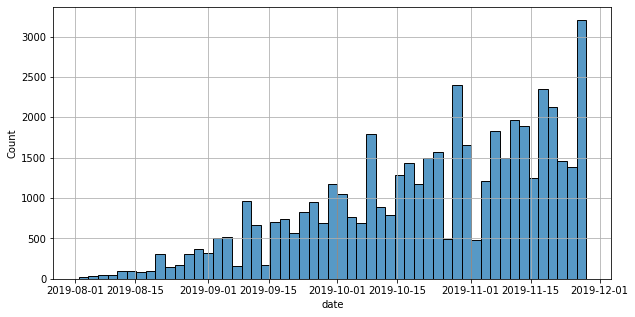

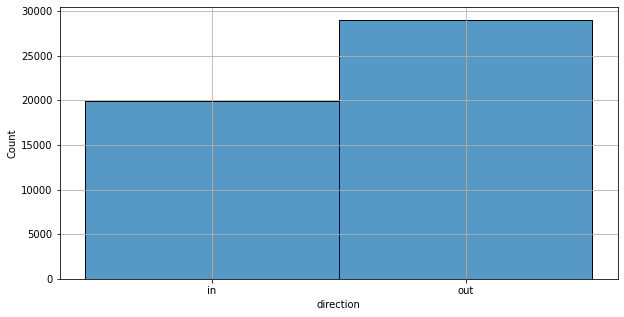

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


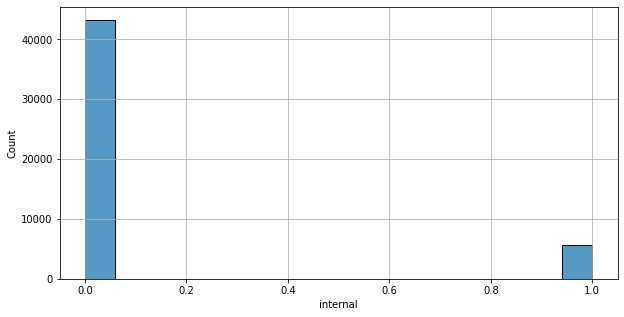

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


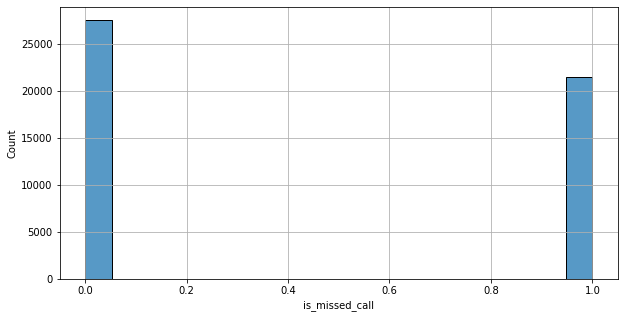

In [15]:
# –ø–æ—Å—Ç—Ä–æ–∏–º –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—ã –¥–ª—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏ –¥–∞–Ω–Ω—ã—Ö —Å –ø–æ–º–æ—â—å—é —Ü–∏–∫–ª–∞ 
columns = ['date', 'direction', 'internal', 'is_missed_call']

for col in columns:
    plt.figure(figsize=(10, 5))
    plt.grid()
    sns.histplot(data=df, x=df[col])
    plt.show()

<div style="border:solid green 1px; padding: 10px">

–ú—ã —Ä–∞—Å–ø–æ–ª–∞–≥–∞–µ–º –¥–∞–Ω–Ω—ã–º–∏ –∑–∞ –ø–µ—Ä–∏–æ–¥ —Å 1 –∞–≤–≥—É—Å—Ç–∞ 2019 –ø–æ 27 –Ω–æ—è–±—Ä—è 2019, –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏ 4 –º–µ—Å—è—Ü–∞. –û–¥–Ω–∞–∫–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–ø–∏—Å–µ–π –≤ –Ω–∞—á–∞–ª–µ –ø–µ—Ä–∏–æ–¥–∞ –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ –º–µ–Ω—å—à–µ —á–µ–º –≤ –∫–æ–Ω—Ü–µ.
    
* –ò—Å—Ö–æ–¥—è—â–∏—Ö –∑–≤–æ–Ω–∫–æ–≤ –±–æ–ª—å—à–µ, —á–µ–º –≤—Ö–æ–¥—è—â–∏—Ö –Ω–∞ ~ 9000.
    
* –†–∞–∑–≥–æ–≤–æ—Ä–æ–≤ –º–µ–∂–¥—É –æ–ø–µ—Ä–∞—Ç–æ—Ä–∞–º–∏ –Ω–∞–º–Ω–æ–≥–æ –º–µ–Ω—å—à–µ —á–µ–º –ø–æ –≤–Ω–µ—à–Ω–∏–º –≤—ã–∑–æ–≤–∞–º (–≤—Å–µ–≥–æ 5763 —à—Ç.).
    
* –†–∞–∑–Ω–∏—Ü–∞ –º–µ–∂–¥—É –ø—Ä–∏–Ω—è—Ç—ã–º–∏ –∏ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–º–∏ –≤—ã–∑–æ–≤–∞–º–∏ (–∫–∞–∫ –¥–ª—è –≤—Ö–æ–¥—è—â–∏—Ö, —Ç–∞–∫ –∏ –¥–ª—è –∏—Å—Ö–æ–¥—è—â–∏—Ö) —Å–æ—Å—Ç–∞–≤–ª—è–µ—Ç –æ–∫–æ–ª–æ 6000.

In [16]:
# –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –¥–∞–Ω–Ω—ã–µ –ø–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤—É –∑–≤–æ–Ω–∫–æ–≤
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.grid()
ax1.hist(df['calls_count'])
ax1.set_title('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–≤–æ–Ω–∫–æ–≤')
ax2.grid()
ax2.hist(df['calls_count'], bins=50, range=(200, 5000))
ax2.set_title('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–≤–æ–Ω–∫–æ–≤ –æ—Ç 200 –∏ –≤—ã—à–µ');

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.grid()
ax1.hist(df.query('total_call_duration_frmtd != "0:00:00"')['total_call_duration_frmtd'].value_counts())
ax1.set_title('total_call_duration –±–µ–∑ —É—á–µ—Ç–∞ –Ω—É–ª–µ–≤—ã—Ö –ø–æ –≤—Ä–µ–º–µ–Ω–∏ –∑–≤–æ–Ω–∫–æ–≤')
ax2.grid()
ax2.hist(df.query('call_duration_frmtd != "0:00:00"')['call_duration_frmtd'].value_counts())
ax2.set_title('call_duration –±–µ–∑ —É—á–µ—Ç–∞ –Ω—É–ª–µ–≤—ã—Ö –ø–æ –≤—Ä–µ–º–µ–Ω–∏ –∑–≤–æ–Ω–∫–æ–≤');

<div style="border:solid green 1px; padding: 10px">
    
–ë–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ –æ–±—Ä–∞–±–∞—Ç—ã–≤–∞–µ—Ç –æ—Ç 1 –¥–æ 200 –∑–≤–æ–Ω–∫–æ–≤, –Ω–æ –µ—Å—Ç—å –∏ —Ç–µ, —É –∫–æ–≥–æ –∑–≤–æ–Ω–∫–æ–≤ –±–æ–ª—å—à–µ (–º–∞–∫—Å–∏–º—É–º 4817 —à—Ç.).
    
–ü–æ –¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ (–æ–±—â–µ–π –∏–ª–∏ –±–µ–∑ –æ–∂–∏–¥–∞–Ω–∏—è) –µ—Å—Ç—å –≤—ã–∑–æ–≤—ã:
- –ø–æ –Ω–µ—Å–∫–æ–ª—å–∫–æ —Å–µ–∫—É–Ω–¥ (–æ–¥–Ω–∞, —Å–µ–º—å, –¥–µ—Å—è—Ç—å), –≤–æ–∑–º–æ–∂–Ω–æ —ç—Ç–æ "—Å–æ—Ä–≤–∞–≤—à–∏–µ—Å—è" –∑–≤–æ–Ω–∫–∏, –∫ –ø—Ä–∏–º–µ—Ä—É –∏–∑-–∑–∞ —Ä–∞–∑—ä–µ–¥–∏–Ω–µ–Ω–∏—è –∏–ª–∏ –≤ —Å–ª—É—á–∞–µ –Ω–µ—á–∞—è–Ω–Ω–æ–≥–æ –Ω–∞–∂–∞—Ç–∏—è –∫–Ω–æ–ø–∫–∏ "–æ—Ç–±–æ–π —Å–≤—è–∑–∏", –∏–ª–∏ –æ—à–∏–±–ª–∏—Å—å –Ω–æ–º–µ—Ä–æ–º ü§≠;
- –ø–æ –Ω–µ—Å–∫–æ–ª—å–∫–æ —á–∞—Å–æ–≤ (10 –∏ –±–æ–ª–µ–µ) –∏ –¥–∞–∂–µ –±–æ–ª—å—à–µ –æ–¥–Ω–æ–≥–æ –¥–Ω—è, —á—Ç–æ –≤—ã–≥–ª—è–¥–∏—Ç –¥–æ–≤–æ–ª—å–Ω–æ —Å—Ç—Ä–∞–Ω–Ω–æ.

–ü–æ —É–º–æ–ª—á–∞–Ω–∏—é –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–π –¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å—é –∑–≤–æ–Ω–∫–∞ —Å—á–∏—Ç–∞–µ—Ç—Å—è –¥–∏–∞–ø–∞–∑–æ–Ω –æ—Ç 30 —Å–µ–∫—É–Ω–¥ –¥–æ 2 –º–∏–Ω—É—Ç. –í–æ–∑–º–æ–∂–Ω–æ –∏ –µ—Å—Ç—å —Ç–∞–∫–∏–µ –≤–æ–ø—Ä–æ—Å—ã, –∫–æ—Ç–æ—Ä—ã–µ –ø—Ä–∏—Ö–æ–¥–∏—Ç—Å—è —Ä–µ—à–∞—Ç—å –Ω–µ –æ–¥–∏–Ω —á–∞—Å, –Ω–æ —É–∂ —Ç–æ—á–Ω–æ –Ω–µ —Å—É—Ç–∫–∏ –∏ –±–æ–ª–µ–µ. –û–≥—Ä–∞–Ω–∏—á–∏–º –¥–∞–Ω–Ω—ã–µ –ø–æ –≤–µ—Ä—Ö–Ω–µ–º—É –∑–Ω–∞—á–µ–Ω–∏—é –≤ 5 —á–∞—Å–æ–≤.    

In [18]:
df = df.query('call_duration <= 18000')

### –î–æ–±–∞–≤–∏–º –Ω–æ–≤—ã–µ —Å—Ç–æ–ª–±—Ü—ã –≤ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º

–î–æ–±–∞–≤–∏–º –≤ –æ—Å–Ω–æ–≤–Ω–æ–π –¥–∞—Ç–∞—Ñ—Ä–µ–π–º —Å—Ç–æ–ª–±–µ—Ü —Å –º–µ—Å—è—Ü–µ–º, –∑–∞ –∫–æ—Ç–æ—Ä—ã–π —Å–æ–±—Ä–∞–Ω–∞ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞, –∏ —Å—Ç–æ–ª–±–µ—Ü —Å –≤—Ä–µ–º–µ–Ω–µ–º –æ–∂–∏–¥–∞–Ω–∏—è –Ω–∞ –ª–∏–Ω–∏–∏:

In [19]:
# –¥–æ–±–∞–≤–∏–º —Å—Ç–æ–ª–±–µ—Ü —Å –º–µ—Å—è—Ü–µ–º —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏
df['month'] = df['date'].dt.month

In [20]:
# –¥–æ–±–∞–≤–∏–º –≤—Ä–µ–º—è –æ–∂–∏–¥–∞–Ω–∏—è –Ω–∞ –ª–∏–Ω–∏–∏
df['waiting_time'] = df['total_call_duration'] - df['call_duration']
df.head()

user_id                date direction  internal  operator_id  \
0   166377 2019-08-03 21:00:00        in     False            0   
1   166377 2019-08-04 21:00:00       out      True       880022   
2   166377 2019-08-04 21:00:00       out      True       880020   
3   166377 2019-08-04 21:00:00       out      True       880020   
4   166377 2019-08-04 21:00:00       out     False       880022   

   is_missed_call  calls_count  call_duration  total_call_duration  \
0            True            2              0                    4   
1            True            3              0                    5   
2            True            1              0                    1   
3           False            1             10                   18   
4            True            3              0                   25   

  call_duration_frmtd total_call_duration_frmtd  month  waiting_time  
0             0:00:00                   0:00:04      8             4  
1             0:00:00                   0:00:05      8             5  
2             0:00:00                   0:00:01      8             1  
3             0:00:10                   0:00:18      8             8  
4             0:00:00                   0:00:25      8            25

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48699 entries, 0 to 48891
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   user_id                    48699 non-null  int64         
 1   date                       48699 non-null  datetime64[ns]
 2   direction                  48699 non-null  object        
 3   internal                   48699 non-null  bool          
 4   operator_id                48699 non-null  int64         
 5   is_missed_call             48699 non-null  bool          
 6   calls_count                48699 non-null  int64         
 7   call_duration              48699 non-null  int64         
 8   total_call_duration        48699 non-null  int64         
 9   call_duration_frmtd        48699 non-null  object        
 10  total_call_duration_frmtd  48699 non-null  object        
 11  month                      48699 non-null  int64         
 12  wait

### –†–∞–∑–¥–µ–ª–∏–º –∫–æ–ª–ª-—Ü–µ–Ω—Ç—Ä—ã –ø–æ –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏—é –≤—ã–∑–æ–≤–æ–≤

–í –Ω–∞—à–∏—Ö –¥–∞–Ω–Ω—ã—Ö –µ—Å—Ç—å —Ä–∞–∑–¥–µ–ª–µ–Ω–∏–µ –Ω–∞ –≤—Ö–æ–¥—è—â–∏–µ –æ–±—Ä–∞—â–µ–Ω–∏—è –∏–ª–∏ –∏—Å—Ö–æ–¥—è—â–∏–µ –∑–≤–æ–Ω–∫–∏ (—Å—Ç–æ–ª–±–µ—Ü `direction`, –≥–¥–µ `out`- –∏—Å—Ö–æ–¥—è—â–∏–π –≤—ã–∑–æ–≤, `in` ‚Äî –≤—Ö–æ–¥—è—â–∏–π –≤—ã–∑–æ–≤), –≤—ã–¥–µ–ª–∏–º —Ç–æ–ª—å–∫–æ –≤–Ω–µ—à–Ω–∏–µ –≤—Ö–æ–¥—è—â–∏–µ –∏ –≤–Ω–µ—à–Ω–∏–µ –∏—Å—Ö–æ–¥—è—â–∏–µ –≤—ã–∑–æ–≤—ã (–Ω–∞ —Ç–æ, –≤–Ω–µ—à–Ω–∏–π –ª–∏ –∑–≤–æ–Ω–æ–∫, —É–∫–∞–∑—ã–≤–∞–µ—Ç –∑–Ω–∞—á–µ–Ω–∏–µ –≤ —Å—Ç–æ–ª–±—Ü–µ `internal`) –∏ —Ä–∞–∑–¥–µ–ª–∏–º –ø–æ —ç—Ç–æ–º—É –ø—Ä–∏–∑–Ω–∞–∫—É –∫–æ–ª–ª-—Ü–µ–Ω—Ç—Ä—ã.

In [22]:
out_calls = df.query('direction == "out" and internal==False')
in_calls = df.query('direction == "in" and internal==False')

###  –û—Ç—Å–æ—Ä—Ç–∏—Ä—É–µ–º –∑–∞–ø–∏—Å–∏ –ø–æ –Ω–∞–∑–Ω–∞—á–µ–Ω–∏—é –æ–ø–µ—Ä–∞—Ç–æ—Ä–∞ –∏ –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ä–∞–±–æ—á–∏—Ö –¥–Ω–µ–π

–û—Å—Ç–∞–≤–∏–º –¥–ª—è –∞–Ω–∞–ª–∏–∑–∞ —Ç–æ–ª—å–∫–æ —Ç–µ –∑–∞–ø–∏—Å–∏, –≤ –∫–æ—Ç–æ—Ä—ã—Ö –ø—Ä–æ–∏–∑–æ—à–ª–æ –Ω–∞–∑–Ω–∞—á–µ–Ω–∏–µ –æ–ø–µ—Ä–∞—Ç–æ—Ä–∞ –ø—Ä–∏ –≤—Ö–æ–¥—è—â–∏—Ö –≤—ã–∑–æ–≤–∞—Ö (—Ç.–∫. –Ω–∞–º –Ω—É–∂–Ω–æ –æ—Ü–µ–Ω–∏—Ç—å –∏–º–µ–Ω–Ω–æ —Ä–∞–±–æ—Ç—É –æ–ø–µ—Ä–∞—Ç–æ—Ä–æ–≤), –∞ —Ç–∞–∫–∂–µ –ø–æ—Å–º–æ—Ç—Ä–∏–º –∫–∞–∫ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª—è–µ—Ç—Å—è –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ä–∞–±–æ—á–∏—Ö –¥–Ω–µ–π –¥–ª—è –æ–ø–µ—Ä–∞—Ç–æ—Ä–æ–≤ –≤ —Ä–∞–∑—Ä–µ–∑–µ –∫–æ–ª–ª-—Ü–µ–Ω—Ç—Ä–∞—Ö. –ê —Ç–∞–∫–∂–µ –¥–æ–±–∞–≤–∏–º –Ω–æ–≤—ã–π —Å—Ç–æ–ª–±–µ—Ü —Å –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º –æ–±—Ä–∞–±–æ—Ç–∞–Ω–Ω—ã—Ö –≤—ã–∑–æ–≤–æ–≤.

In [23]:
# —É–±–µ—Ä–µ–º –∑–∞–ø–∏—Å–∏ –±–µ–∑ –æ–ø–µ—Ä–∞—Ç–æ—Ä–æ–≤ –¥–ª—è –≤—Ö–æ–¥—è—â–∏—Ö –≤—ã–∑–æ–≤–æ–≤
in_calls = in_calls.query('operator_id != 0')

–î–ª—è –∫–æ–ª–ª-—Ü–µ–Ω—Ç—Ä–æ–≤, —Ä–∞–±–æ—Ç–∞—é—â–∏—Ö –ø–æ –∏—Å—Ö–æ–¥—è—â–∏–º –≤—ã–∑–æ–≤–∞–º –Ω–∞–∑–Ω–∞—á–µ–Ω–∏–µ –æ–ø–µ—Ä–∞—Ç–æ—Ä–∞ –¥–æ–ª–∂–Ω–æ –±—ã—Ç—å –≤—Å–µ–≥–¥–∞, —Ç.–∫. –∏–º–µ–Ω–Ω–æ –æ–ø–µ—Ä–∞—Ç–æ—Ä –∏–Ω–∏—Ü–∏–∏—Ä—É–µ—Ç –≤–Ω–µ—à–Ω–∏–π –≤—ã–∑–æ–≤. –ü—Ä–æ–≤–µ—Ä–∏–º –µ—Å—Ç—å –ª–∏ –≤ –Ω–∞—à–µ–π —Ç–∞–±–ª–∏—Ü–µ –ø–æ –∏—Å—Ö–æ–¥—è—â–∏–º –≤—ã–∑–æ–≤–∞–º –∑–∞–ø–∏—Å–∏ –±–µ–∑ –Ω–∞–∑–Ω–∞—á–µ–Ω–Ω–æ–≥–æ –æ–ø–µ—Ä–∞—Ç–æ—Ä–∞:

In [24]:
# –ø—Ä–æ–≤–µ—Ä–∫–∞ –Ω–∞–∑–Ω–∞—á–µ–Ω–∏—è –æ–ø–µ—Ä–∞—Ç–æ—Ä–∞ –ø—Ä–∏ –∏—Å—Ö–æ–¥—è—â–∏—Ö –≤—ã–∑–æ–≤–∞—Ö
out_calls.query('operator_id == 0')['operator_id'].count()

145

In [25]:
# –¥–æ–ª—è –æ—Ç –æ–±—â–µ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–∞
out_calls.query('operator_id == 0')['operator_id'].count() / out_calls.shape[0] * 100

0.6081194430464687

–¢–∞–∫–∏–µ –∑–∞–ø–∏—Å–∏ –µ—Å—Ç—å (146 —à—Ç.), –∑–¥–µ—Å—å –≤–æ–∑–º–æ–∂–µ–Ω —Ç–µ—Ö–Ω–∏—á–µ—Å–∫–∏–π —Å–±–æ–π –ø—Ä–∏ –∑–∞–ø–∏—Å–∏ —Å—Ç—Ä–æ–∫–∏. –¢.–∫. –¥–æ–ª—è —Ç–∞–∫–∏—Ö –∑–Ω–∞—á–µ–Ω–∏–π –æ—Ç –≤—Å–µ–≥–æ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞ –º–∞–ª–∞ (–º–µ–Ω—å—à–µ 1%), —É–¥–∞–ª–∏–º –∏—Ö.

In [26]:
# —É–¥–∞–ª—è–µ–º –∑–∞–ø–∏—Å–∏ –±–µ–∑ –æ–ø–µ—Ä–∞—Ç–æ—Ä–∞
out_calls = out_calls.query('operator_id != 0')

In [27]:
# –ø–æ—Å–º–æ—Ç—Ä–∏–º –∫–∞–∫ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª—è–µ—Ç—Å—è –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ä–∞–±–æ—á–∏—Ö –¥–Ω–µ–π –∏ –≤—ã–∑–æ–≤–æ–≤ –¥–ª—è –æ–ø–µ—Ä–∞—Ç–æ—Ä–æ–≤ –≤ —Ä–∞–∑—Ä–µ–∑–µ –∫–æ–ª–ª-—Ü–µ–Ω—Ç—Ä–æ–≤ –ø–æ –º–µ—Å—è—Ü–∞–º
operator_in_calls = (in_calls.groupby(['user_id','operator_id']).agg({'date': 'count', 'calls_count': 'sum'})
                   .reset_index())
operator_in_calls.columns = ['user_id',  'operator_id', 'days_worked', 'calls_count']

In [28]:
#–¥–æ–±–∞–≤–∏–º —Å—Ç–æ–ª–±–µ—Ü —Å –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–≤–æ–Ω–∫–æ–≤
is_missed_call = (in_calls.query('is_missed_call == True').groupby(['user_id','operator_id'])['calls_count']
                  .sum().reset_index())
is_missed_call.columns = ['user_id', 'operator_id','missed_calls']
operator_in_calls = operator_in_calls.merge(is_missed_call, on=['user_id', 'operator_id'], how='left')
operator_in_calls['missed_calls'] = operator_in_calls['missed_calls'].fillna(0).astype('int')

# –¥–æ–±–∞–≤–∏–º —Å—Ç–æ–ª–±–µ—Ü —Å —Ñ–∞–∫—Ç–∏—á–µ—Å–∫–∏ –ø—Ä–∏–Ω—è—Ç—ã–º–∏ –∑–≤–æ–Ω–∫–∞–º–∏ –≤ –¥–µ–Ω—å, —Å–æ–≤–µ—Ä—à–µ–Ω–Ω—ã–º–∏ –æ–ø–µ—Ä–∞—Ç–æ—Ä–æ–º
operator_in_calls['success_calls'] = operator_in_calls['calls_count']-operator_in_calls['missed_calls']
operator_in_calls.head(10)

user_id  operator_id  days_worked  calls_count  missed_calls  success_calls
0   166377       880020            7            7             0              7
1   166377       880022            8            8             0              8
2   166377       880026           18           24             0             24
3   166377       880028           41           63             0             63
4   166391       882476            3            3             0              3
5   166391       882478            1            1             0              1
6   166392       886892            1            2             0              2
7   166392       891900           17           33             0             33
8   166392       891906           29           67             0             67
9   166399       886674            9           11             0             11

In [29]:
# –ø–æ—Å–º–æ—Ç—Ä–∏–º –∫–∞–∫ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª—è–µ—Ç—Å—è –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ä–∞–±–æ—á–∏—Ö –¥–Ω–µ–π –∏ –≤—ã–∑–æ–≤–æ–≤ –¥–ª—è –æ–ø–µ—Ä–∞—Ç–æ—Ä–æ–≤ –≤ —Ä–∞–∑—Ä–µ–∑–µ –∫–æ–ª–ª-—Ü–µ–Ω—Ç—Ä–æ–≤ –ø–æ –º–µ—Å—è—Ü–∞–º
operator_out_calls = (out_calls.groupby(['user_id','operator_id']).agg({'date': 'count', 'calls_count':'sum'})
                      .reset_index())
operator_out_calls.columns = ['user_id', 'operator_id', 'days_worked', 'calls_count']

In [30]:
#–¥–æ–±–∞–≤–∏–º —Å—Ç–æ–ª–±–µ—Ü —Å –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–≤–æ–Ω–∫–æ–≤
missed_calls = (out_calls.query('is_missed_call == True').groupby(['user_id','operator_id'])['calls_count']
                  .sum().reset_index())
missed_calls.columns = ['user_id', 'operator_id','missed_calls']
operator_out_calls = operator_out_calls.merge(missed_calls, on=['user_id', 'operator_id'], how='left')
operator_out_calls['missed_calls'] = operator_out_calls['missed_calls'].fillna(0).astype('int')

# –¥–æ–±–∞–≤–∏–º —Å—Ç–æ–ª–±–µ—Ü —Å —Ñ–∞–∫—Ç–∏—á–µ—Å–∫–∏ –ø—Ä–∏–Ω—è—Ç—ã–º–∏ –∑–≤–æ–Ω–∫–∞–º–∏ –≤ –¥–µ–Ω—å, —Å–æ–≤–µ—Ä—à–µ–Ω–Ω—ã–º–∏ –æ–ø–µ—Ä–∞—Ç–æ—Ä–æ–º
operator_out_calls['success_calls'] = operator_out_calls['calls_count']-operator_out_calls['missed_calls']
operator_out_calls.head(10)

user_id  operator_id  days_worked  calls_count  missed_calls  success_calls
0   166377       880020           10           34            19             15
1   166377       880022           54          174            90             84
2   166377       880026          151         2188           628           1560
3   166377       880028          154         2489           987           1502
4   166377       881278            5           12             9              3
5   166405       882684          101          651           206            445
6   166405       882686          150         2876           941           1935
7   166405       882688            7           43            15             28
8   166405       882690           40         1416           466            950
9   166405       902510           94         1841           644           1197

<div style="border:solid green 1px; padding: 10px">
    
–ó–¥–µ—Å—å –≤–∏–¥–Ω–æ, —á—Ç–æ –µ—Å—Ç—å –æ–ø–µ—Ä–∞—Ç–æ—Ä—ã, –∫–æ—Ç–æ—Ä—ã–µ –∑–∞ –æ–¥–∏–Ω –¥–µ–Ω—å —Ä–∞–±–æ—Ç—ã –æ–±—Ä–∞–±–æ—Ç–∞–ª–∏ –æ–¥–∏–Ω –∑–≤–æ–Ω–æ–∫, –∞ –µ—Å—Ç—å —Ç–∞–∫–∏–µ, —É –∫–æ—Ç–æ—Ä—ã—Ö –≤ –¥–µ–Ω—å –∑–≤–æ–Ω–∫–æ–≤ –æ–±—Ä–∞–±–æ—Ç–∞–Ω–æ –Ω–∞–º–Ω–æ–≥–æ –±–æ–ª—å—à–µ. –¢–∞–∫–∂–µ –≤–∏–¥–Ω–æ —Å–∫–æ–ª—å–∫–æ –∑–≤–æ–Ω–∫–æ–≤ –±—ã–ª–æ –ø—Ä–æ–ø—É—â–µ–Ω–æ.

–ò–∑-–∑–∞ —Ç–æ–≥–æ, —á—Ç–æ –≤ –∫–æ–ª–ª-—Ü–µ–Ω—Ç—Ä–∞—Ö –µ—Å—Ç—å —è–≤–Ω—ã–µ —Ç—Ä—É–¥–æ–≥–æ–ª–∏–∫–∏, –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Å–∫–æ–ª—å–∫–æ —Å—Ä–µ–¥–Ω–µ–µ –æ—Ç–ª–∏—á–∞–µ—Ç—Å—è –æ—Ç –º–µ–¥–∏–∞–Ω—ã –ø–æ –¥–∞—Ç–∞—Å–µ—Ç–∞–º:

In [31]:
print('–í—Ö–æ–¥—è—â–∏–µ')
display(in_calls.describe())
print('–ò—Å—Ö–æ–¥—è—â–∏–µ')
out_calls.describe()

–í—Ö–æ–¥—è—â–∏–µ


user_id    operator_id   calls_count  call_duration  \
count   12275.000000   12275.000000  12275.000000   12275.000000   
mean   167291.692709  916333.850265      7.333442     741.152098   
std       580.205442   20178.040904     13.768738    1271.452809   
min    166377.000000  879896.000000      1.000000       0.000000   
25%    166837.000000  900894.000000      1.000000      70.000000   
50%    167158.000000  912722.000000      3.000000     275.000000   
75%    167816.000000  936110.000000      7.000000     867.500000   
max    168606.000000  973286.000000    207.000000   15663.000000   

       total_call_duration         month  waiting_time  
count         12275.000000  12275.000000  12275.000000  
mean            840.489043     10.209043     99.336945  
std            1401.784718      0.831865    187.955734  
min               1.000000      8.000000      0.000000  
25%              97.000000     10.000000     17.000000  
50%             324.000000     10.000000     40.000000  
75%             973.000000     11.000000    100.000000  
max           16759.000000     11.000000   3998.000000

–ò—Å—Ö–æ–¥—è—â–∏–µ


user_id    operator_id   calls_count  call_duration  \
count   23699.000000   23699.000000  23699.000000   23699.000000   
mean   167315.836533  916670.636567     21.541584     983.088569   
std       620.488007   21794.959816     61.496058    2075.008148   
min    166377.000000  879896.000000      1.000000       0.000000   
25%    166715.000000  900180.000000      2.000000       0.000000   
50%    167175.000000  916618.000000      7.000000      42.000000   
75%    167888.000000  937780.000000     22.000000     999.000000   
max    168606.000000  973120.000000   4817.000000   17575.000000   

       total_call_duration         month  waiting_time  
count         23699.000000  23699.000000  23699.000000  
mean           1409.626567     10.158446    426.537997  
std            2603.727655      0.861250   1276.955985  
min               0.000000      8.000000      0.000000  
25%              99.000000     10.000000     37.000000  
50%             410.000000     10.000000    127.000000  
75%            1526.500000     11.000000    386.000000  
max           58027.000000     11.000000  46474.000000

–°—Ä–µ–¥–Ω–µ–µ —Å–∏–ª—å–Ω–æ –æ—Ç–ª–∏—á–∞–µ—Ç—Å—è –æ—Ç –º–µ–¥–∏–∞–Ω—ã –∏ –ø–æ —Ç–∞–±–ª–∏—Ü–µ –≤—Ö–æ–¥—è—â–∏—Ö –≤—ã–∑–æ–≤–æ–≤, –∏ –ø–æ —Ç–∞–±–ª–∏—Ü–µ –∏—Å—Ö–æ–¥—è—â–∏—Ö.
–ü–æ—ç—Ç–æ–º—É –ø—Ä–∏ –ø–æ–¥—Å—á–µ—Ç–µ —Å—Ä–µ–¥–Ω–∏—Ö –ø–æ–∫–∞–∑–∞—Ç–µ–ª–µ–π –ø–æ –∫–∞–∂–¥–æ–º—É –∫–æ–ª–ª-—Ü–µ–Ω—Ç—Ä—É –≤ –¥–µ–Ω—å –±—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –º–µ–¥–∏–∞–Ω–Ω–æ–µ –∑–∞—á–µ–Ω–∏–µ.

### –†–∞—Å—á–∏—Ç–∞–µ–º —Å—Ä–µ–¥–Ω–∏–µ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏ –¥–ª—è –∫–æ–ª–ª-—Ü–µ–Ω—Ç–∞ –≤ –¥–µ–Ω—å

–°–æ–±–µ—Ä–µ–º –≤ –æ–¥–Ω—É —Ç–∞–±–ª–∏—Ü—É –¥–∞–Ω–Ω—ã–µ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –∫–æ–ª–ª-—Ü–µ–Ω—Ç—Ä–∞ –ø–æ:
- –æ–±—â–µ–º—É –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥–Ω–µ–π –Ω–∞–±–ª—é–¥–µ–Ω–∏–π, –æ–±—â–µ–º—É –∫–æ–ª–∏—á–µ—Å—Ç–≤—É –∑–≤–æ–Ω–∫–æ–≤, –æ–±—â–µ–π –ø—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ —Å/–±–µ–∑ —É—á–µ—Ç–∞ –≤—Ä–µ–º–µ–Ω–∏ –æ–∂–∏–¥–∞–Ω–∏—è, 
–æ–±—â–µ–º—É –≤—Ä–µ–º–µ–Ω–∏ –æ–∂–∏–¥–∞–Ω–∏—è;
- —Å—Ä–µ–¥–Ω–µ–º—É –∫–æ–ª–∏—á–µ—Å—Ç–≤—É –∑–≤–æ–Ω–∫–æ–≤ –≤ –¥–µ–Ω—å;
- —Å—Ä–µ–¥–Ω–µ–π –ø—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –∑–≤–æ–Ω–∫–∞ –≤ –¥–µ–Ω—å (—Å/–±–µ–∑ —É—á–µ—Ç–∞ –≤—Ä–µ–º–µ–Ω–∏ –æ–∂–∏–¥–∞–Ω–∏—è);
- —Å—Ä–µ–¥–Ω–µ–≥–æ –≤—Ä–µ–º–µ–Ω–∏ –æ–∂–∏–¥–∞–Ω–∏—è –Ω–∞ –ª–∏–Ω–∏–∏.

In [32]:
# —Å–æ–±–∏—Ä–∞–µ–º —Ç–∞–±–ª–∏—Ü—É –ø–æ –≤—Ö–æ–¥—è—â–∏–º –≤—ã–∑–æ–≤–∞–º
in_calls_df = (in_calls.groupby('user_id')
                    .agg({'date': 'count', 'calls_count': 'sum', 'call_duration': 'sum',
                          'total_call_duration': 'sum', 'waiting_time': 'sum'}).reset_index()
                   )
in_calls_df['calls_per_day'] = round(in_calls_df['calls_count'] / in_calls_df['date'], 2)
in_calls_df['call_duration_per_call'] = round(in_calls_df['call_duration'] / in_calls_df['calls_count'], 2)
in_calls_df['ttl_call_duration_per_call'] = round(in_calls_df['total_call_duration'] / in_calls_df['calls_count'], 2)
in_calls_df['waiting_time_per_call'] = round(in_calls_df['waiting_time'] / in_calls_df['calls_count'], 2)
in_calls_df.head()

user_id  date  calls_count  call_duration  total_call_duration  \
0   166377    74          102           7436                 8088   
1   166391     4            4            249                  357   
2   166392    47          102          16652                19732   
3   166399     9           11            166                  334   
4   166405   248         2191         381450               422081   

   waiting_time  calls_per_day  call_duration_per_call  \
0           652           1.38                   72.90   
1           108           1.00                   62.25   
2          3080           2.17                  163.25   
3           168           1.22                   15.09   
4         40631           8.83                  174.10   

   ttl_call_duration_per_call  waiting_time_per_call  
0                       79.29                   6.39  
1                       89.25                  27.00  
2                      193.45                  30.20  
3                       30.36                  15.27  
4                      192.64                  18.54

In [33]:
# —Å–æ–±–∏—Ä–∞–µ–º —Ç–∞–±–ª–∏—Ü—É –ø–æ –∏—Å—Ö–æ–¥—è—â–∏–º –≤—ã–∑–æ–≤–∞–º
out_calls_df = (out_calls.groupby('user_id')
                    .agg({'date': 'count', 'calls_count': 'sum', 'call_duration': 'sum',
                          'total_call_duration': 'sum', 'waiting_time': 'sum'}).reset_index()
                   )
out_calls_df['calls_per_day'] = round(out_calls_df['calls_count'] / out_calls_df['date'], 2)
out_calls_df['call_duration_per_call'] = round(out_calls_df['call_duration'] / out_calls_df['calls_count'], 2)
out_calls_df['ttl_call_duration_per_call'] = round(out_calls_df['total_call_duration'] / out_calls_df['calls_count'], 2)
out_calls_df['waiting_time_per_call'] = round(out_calls_df['waiting_time'] / out_calls_df['calls_count'], 2)
out_calls_df.head()

user_id  date  calls_count  call_duration  total_call_duration  \
0   166377   374         4897         310419               378454   
1   166405   581         9789         770393               955972   
2   166406   243         8048         311820               425935   
3   166407    88          306          19058                22864   
4   166485   361         6132         346789               440877   

   waiting_time  calls_per_day  call_duration_per_call  \
0         68035          13.09                   63.39   
1        185579          16.85                   78.70   
2        114115          33.12                   38.75   
3          3806           3.48                   62.28   
4         94088          16.99                   56.55   

   ttl_call_duration_per_call  waiting_time_per_call  
0                       77.28                  13.89  
1                       97.66                  18.96  
2                       52.92                  14.18  
3                       74.72                  12.44  
4                       71.90                  15.34

–í—Ö–æ–¥—è—â–∏–µ


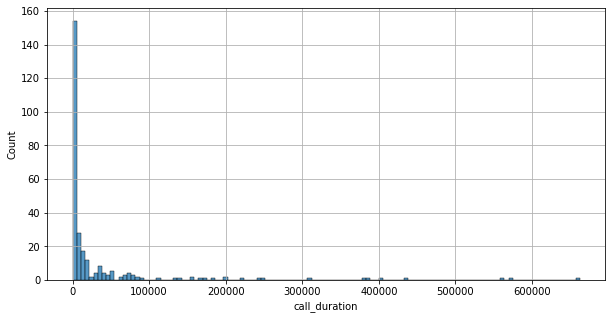

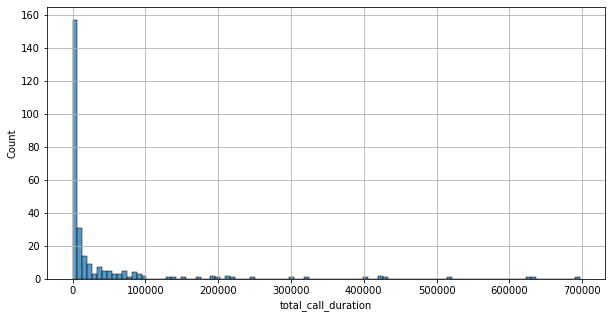

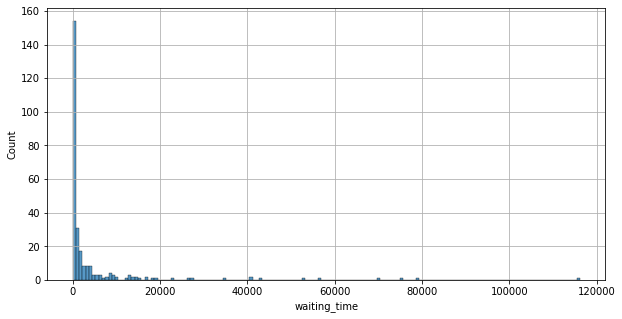

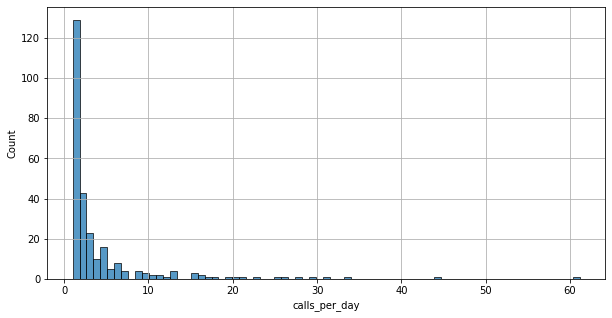

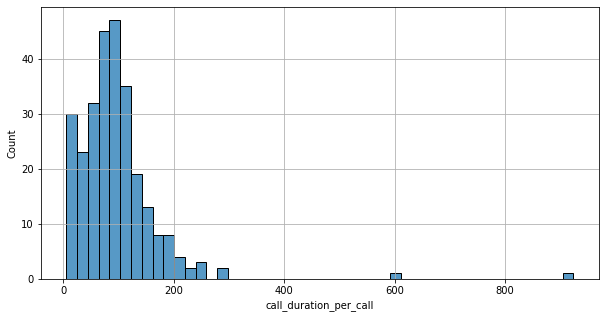

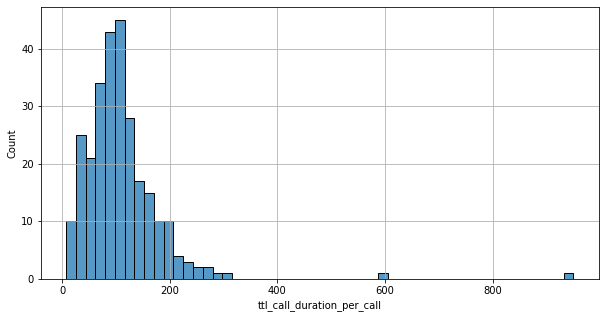

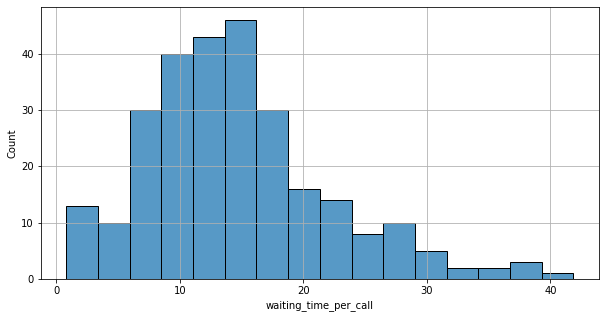

In [34]:
# –ø–æ—Å—Ç—Ä–æ–∏–º –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—ã –¥–ª—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏ –¥–∞–Ω–Ω—ã—Ö —Å –ø–æ–º–æ—â—å—é —Ü–∏–∫–ª–∞ 
print('–í—Ö–æ–¥—è—â–∏–µ')
for col in in_calls_df.drop('user_id', axis=1).columns:
    plt.figure(figsize=(10, 5))
    plt.grid()
    sns.histplot(data=in_calls_df, x=in_calls_df[col])
    plt.show()

–ò—Å—Ö–æ–¥—è—â–∏–µ


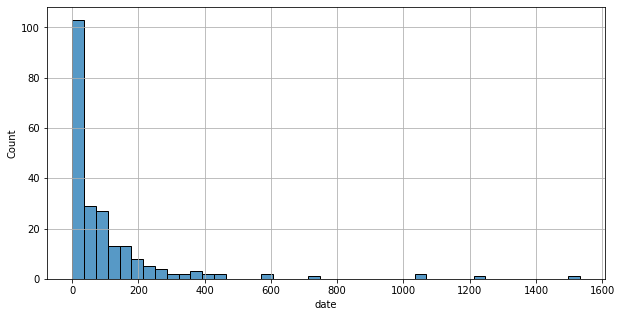

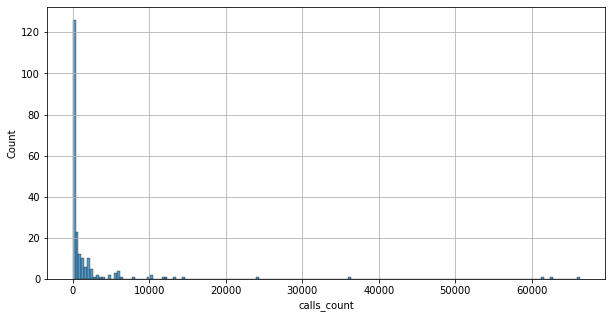

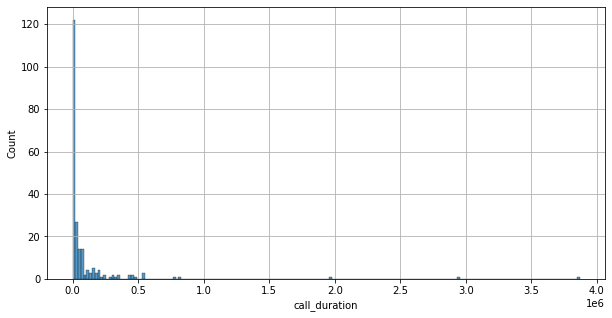

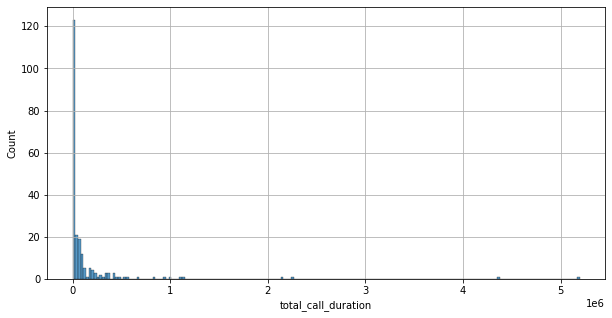

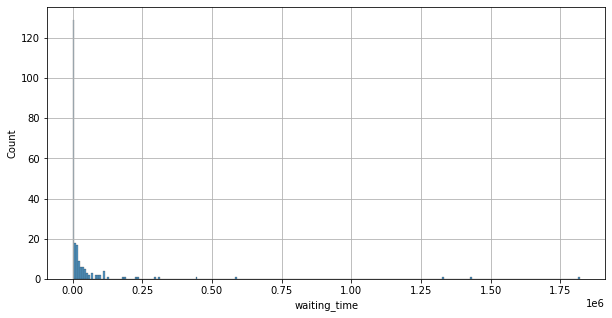

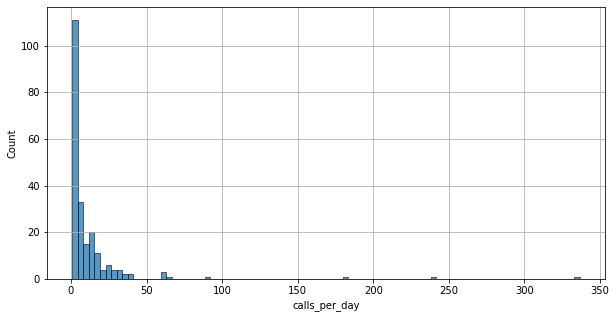

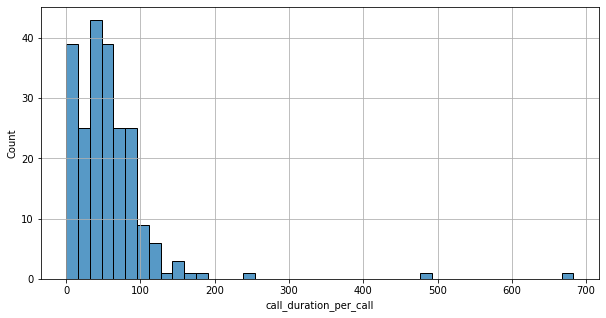

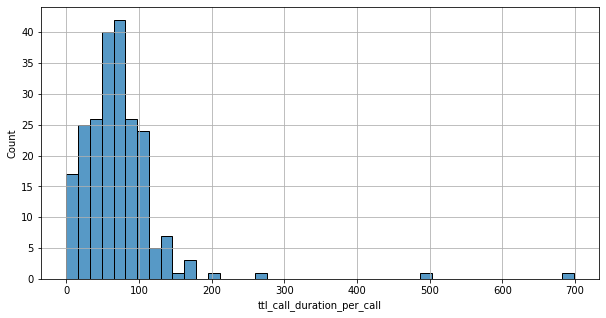

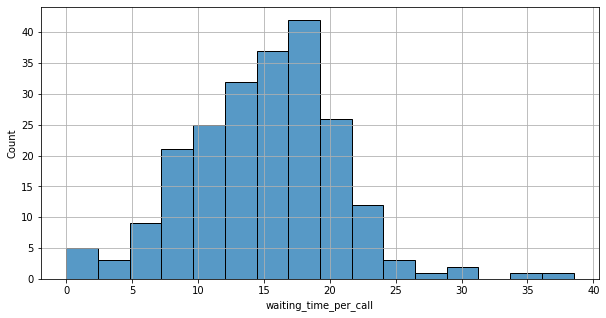

In [35]:
# –ø–æ—Å—Ç—Ä–æ–∏–º –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—ã –¥–ª—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏ –¥–∞–Ω–Ω—ã—Ö —Å –ø–æ–º–æ—â—å—é —Ü–∏–∫–ª–∞ 
print('–ò—Å—Ö–æ–¥—è—â–∏–µ')
for col in out_calls_df.drop('user_id', axis=1).columns:
    plt.figure(figsize=(10, 5))
    plt.grid()
    sns.histplot(data=out_calls_df, x=out_calls_df[col])
    plt.show()

In [36]:
# –ø–æ—Å–º–æ—Ç—Ä–∏–º –∫–æ–≥–¥–∞ –∑–∞—Ä–µ–≥–∏—Å—Ç—Ä–∏—Ä–æ–≤–∞–Ω—ã –∫–ª–∏–µ–Ω—Ç—ã —Å –º–∞–ª—ã–º —á–∏—Å–ª–æ–º –∑–≤–æ–Ω–∫–æ–≤ –≤ –¥–µ–Ω—å (–¥–æ 5 —à—Ç.)
print('–í—Ö–æ–¥—è—â–∏–µ')
(in_calls_df.query('calls_per_day <= 5')[['user_id', 'date', 'calls_per_day']]
 .merge(clients[['user_id', 'date_start']], on='user_id')).sort_values(by='date_start')

–í—Ö–æ–¥—è—â–∏–µ


user_id  date  calls_per_day date_start
0     166377    74           1.38 2019-08-01
1     166391     4           1.00 2019-08-01
2     166392    47           2.17 2019-08-01
3     166399     9           1.22 2019-08-01
4     166406    77           2.09 2019-08-02
5     166407    52           1.54 2019-08-02
6     166428    56           2.20 2019-08-02
7     166481     1           1.00 2019-08-05
8     166482    26           1.85 2019-08-05
9     166485   121           4.30 2019-08-06
10    166487    13           4.31 2019-08-06
11    166495    40           2.08 2019-08-06
12    166503    92           2.74 2019-08-06
15    166536   110           3.41 2019-08-07
13    166520    10           1.50 2019-08-07
14    166533    12           1.83 2019-08-07
16    166548     1           1.00 2019-08-08
17    166585     3           1.33 2019-08-09
18    166604   124           4.31 2019-08-12
19    166609     2           1.00 2019-08-12
20    166619     3           1.00 2019-08-12
21    166636    40           2.60 2019-08-12
22    166649    11           1.64 2019-08-13
23    166660    21           1.95 2019-08-13
28    166678   144           3.15 2019-08-14
29    166680    26           1.15 2019-08-14
27    166677    31           2.35 2019-08-14
25    166669     7           1.29 2019-08-14
24    166666     2           1.00 2019-08-14
26    166671     5           1.20 2019-08-14
30    166688     9           1.00 2019-08-15
31    166692    10           1.20 2019-08-15
32    166697     7           1.14 2019-08-15
33    166711     1           1.00 2019-08-15
34    166713    31           1.39 2019-08-15
35    166726     7           1.29 2019-08-16
36    166727    10           1.10 2019-08-16
37    166732     4           1.25 2019-08-16
38    166774     9           1.56 2019-08-19
42    166813    19           1.58 2019-08-20
41    166812    20           1.70 2019-08-20
39    166800    60           2.13 2019-08-20
40    166803    37           1.49 2019-08-20
47    166843    19           2.26 2019-08-21
43    166833    69           3.52 2019-08-21
44    166836    32           2.88 2019-08-21
45    166837    32           1.31 2019-08-21
46    166839    38           2.79 2019-08-21
49    166879   109           2.28 2019-08-22
50    166884    16           1.56 2019-08-22
48    166874     2           1.50 2019-08-22
53    166901   121           3.00 2019-08-23
54    166908    22           2.23 2019-08-23
51    166896   124           1.80 2019-08-23
52    166899    16           1.31 2019-08-23
55    166936     9           2.67 2019-08-26
56    166940     7           1.14 2019-08-26
57    166941    22           4.64 2019-08-26
58    166946    20           2.40 2019-08-26
59    166955    20           2.05 2019-08-26
60    166971    12           1.58 2019-08-27
61    166973    88           1.95 2019-08-27
62    166974   104           3.12 2019-08-27
63    166975    32           1.22 2019-08-27
64    166985    29           1.62 2019-08-27
68    167004    46           1.87 2019-08-28
67    167003    28           1.25 2019-08-28
65    166997   128           4.01 2019-08-28
66    167002    15           1.13 2019-08-28
69    167031    22           1.45 2019-08-29
70    167052   120           4.75 2019-08-29
71    167059   171           3.63 2019-08-29
72    167060    23           1.52 2019-08-29
73    167061    14           1.29 2019-08-29
74    167079    17           1.12 2019-08-30
75    167082    87           2.74 2019-08-30
80    167113     1           1.00 2019-09-02
79    167112    40           2.30 2019-09-02
81    167124     8           1.75 2019-09-02
77    167109   108           3.94 2019-09-02
76    167102    59           1.29 2019-09-02
78    167110     4           1.50 2019-09-02
82    167130     3           2.33 2019-09-03
83    167139     1           1.00 2019-09-03
84    167141    31           4.61 2019-09-03
85    167144     6           3.50 2019-09-04
86    167150   163           2.88 2019-09-04
87    167158    60           4.03 2019-09-04


In [37]:
# –ø–æ—Å–º–æ—Ç—Ä–∏–º –∫–æ–≥–¥–∞ –∑–∞—Ä–µ–≥–∏—Å—Ç—Ä–∏—Ä–æ–≤–∞–Ω—ã –∫–ª–∏–µ–Ω—Ç—ã —Å –º–∞–ª—ã–º —á–∏—Å–ª–æ–º –∑–≤–æ–Ω–∫–æ–≤ –≤ –¥–µ–Ω—å (–¥–æ 5 —à—Ç.)
print('–ò—Å—Ö–æ–¥—è—â–∏–µ')
(out_calls_df.query('calls_per_day <= 5')[['user_id', 'date', 'calls_per_day']]
 .merge(clients[['user_id', 'date_start']], on='user_id')).sort_values(by='date_start')

–ò—Å—Ö–æ–¥—è—â–∏–µ


user_id  date  calls_per_day date_start
0     166407    88           3.48 2019-08-02
1     166507     2           1.50 2019-08-06
2     166541    93           2.27 2019-08-07
3     166604    57           1.42 2019-08-12
4     166609    30           5.00 2019-08-12
5     166619    23           1.96 2019-08-12
6     166636    23           2.35 2019-08-12
7     166660    51           2.35 2019-08-13
8     166669     6           1.00 2019-08-14
9     166678   244           4.75 2019-08-14
10    166688    44           2.57 2019-08-15
11    166692    36           2.28 2019-08-15
12    166713     5           1.80 2019-08-15
14    166732     3           1.67 2019-08-16
13    166717   105           4.51 2019-08-16
15    166774    17           3.18 2019-08-19
16    166800    80           2.96 2019-08-20
17    166803    11           2.64 2019-08-20
18    166812    63           3.19 2019-08-20
19    166813    30           1.47 2019-08-20
20    166843    78           2.92 2019-08-21
21    166874     5           1.60 2019-08-22
22    166884    76           4.53 2019-08-22
23    166901    68           2.81 2019-08-23
24    166939    10           4.90 2019-08-26
25    166946    23           2.43 2019-08-26
26    166958    12           1.92 2019-08-26
29    166974   181           4.33 2019-08-27
27    166971    37           3.70 2019-08-27
28    166973   131           2.40 2019-08-27
30    166993    11           1.91 2019-08-28
31    167002    88           2.66 2019-08-28
32    167003     3           1.00 2019-08-28
33    167004   119           4.29 2019-08-28
34    167012     5           1.60 2019-08-28
35    167052   106           2.24 2019-08-29
36    167061    19           1.79 2019-08-29
37    167078    94           2.87 2019-08-30
38    167082    58           2.62 2019-08-30
42    167122     3           5.00 2019-09-02
41    167113     1           1.00 2019-09-02
40    167110    11           1.64 2019-09-02
39    167109   259           3.01 2019-09-02
43    167144     1           1.00 2019-09-04
44    167172   108           4.72 2019-09-05
45    167176    63           2.25 2019-09-05
46    167180   150           4.28 2019-09-05
47    167183    45           3.13 2019-09-05
48    167189    23           3.13 2019-09-05
49    167199    31           2.94 2019-09-05
50    167200     1           1.00 2019-09-06
53    167246    27           2.78 2019-09-09
54    167250    14           4.79 2019-09-09
51    167238     1           1.00 2019-09-09
52    167244     2           2.00 2019-09-09
57    167275    15           3.47 2019-09-10
58    167288     2           1.00 2019-09-10
55    167263     4           1.75 2019-09-10
56    167264    45           1.53 2019-09-10
59    167338    66           3.39 2019-09-12
60    167359   214           2.89 2019-09-13
61    167364     1           1.00 2019-09-13
62    167397     3           1.00 2019-09-16
63    167445   345           3.59 2019-09-17
64    167451    18           1.89 2019-09-17
65    167455    72           3.42 2019-09-17
66    167456     7           1.29 2019-09-17
67    167475    29           1.76 2019-09-18
68    167497   601           3.33 2019-09-18
71    167533     2           1.00 2019-09-19
72    167543     8           1.12 2019-09-19
69    167521    98           2.64 2019-09-19
70    167530     7           4.71 2019-09-19
73    167575     6           1.17 2019-09-20
74    167599     1           1.00 2019-09-23
75    167621     3           1.00 2019-09-23
76    167630    59           4.47 2019-09-24
77    167644    41           2.05 2019-09-24
78    167646     2           3.00 2019-09-24
79    167715    12           2.58 2019-09-26
80    167742    18           2.06 2019-09-27
81    167759     3           3.33 2019-09-27
82    167840     1           1.00 2019-10-02
83    167852    11           1.73 2019-10-02
84    167906     1           1.00 2019-10-04
88    167947   102           3.30 2019-10-07
89    167948     1           1.00 2019-10-07
90    167958     8           1.75 2019-10-07


<div style="border:solid green 1px; padding: 10px">

–í –æ—Å–Ω–æ–≤–Ω–æ–π –º–∞—Å—Å–µ –∑–Ω–∞—á–µ–Ω–∏—è:
* –≤ —Ä–∞–π–æ–Ω–µ –¥–æ 200 –¥–Ω–µ–π, –µ—Å—Ç—å –∏ –±–æ–ª—å—à–µ;
* –¥–æ 500 –∑–≤–æ–Ω–∫–æ–≤ (10-20 –≤ –¥–µ–Ω—å);
* –º–Ω–æ–≥–æ –∑–Ω–∞—á–µ–Ω–∏–π —Å –º–∞–ª–µ–Ω—å–∫–æ–π –ø—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å—é —Å/–±–µ–∑ —É—á–µ—Ç–∞ –≤—Ä–µ–º–µ–Ω–∏ –æ–∂–∏–¥–∞–Ω–∏—è (–æ–∫–æ–ª–æ 100 —Å–µ–∫—É–Ω–¥ –∑–∞ –∑–≤–æ–Ω–æ–∫);
* –≤—Ä–µ–º—è –æ–∂–∏–¥–∞–Ω–∏—è –∫–æ—Ä–æ—Ç–∫–æ–µ (15-20 —Å–µ–∫ –∑–∞ –∑–≤–æ–Ω–æ–∫);
* –µ—Å—Ç—å –∫–æ–ª–ª-—Ü–µ–Ω—Ç—Ä—ã, –≥–¥–µ –≤—Å–µ–≥–æ –Ω–µ—Å–∫–æ–ª—å–∫–æ –∑–≤–æ–Ω–∫–∞ –≤ –¥–µ–Ω—å, —ç—Ç–æ –º–æ–∂–µ—Ç –±—ã—Ç—å —Å–≤—è–∑–∞–Ω–æ —Å —Ç–µ–º, —á—Ç–æ:
    - –≤ —Å–∏—Å—Ç–µ–º–µ –∫–ª–∏–µ–Ω—Ç—ã –Ω–µ–¥–∞–≤–Ω–æ (–ø–æ –¥–∞—Ç–∞–º —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–∏ –≤–∏–¥–Ω–æ, —á—Ç–æ –∑–∞–≤—Ä–µ–≥–∏—Å—Ç—Ä–∏—Ä–æ–≤–∞–Ω—ã –≤ —Å–µ—Ä–≤–∏—Å–µ –≤ –∫–æ–Ω—Ü–µ –æ–∫—Ç—è–±—Ä—è);
    - –µ—Å—Ç—å —Å–±–æ–∏ –≤ —Ç–µ–ª–µ—Ñ–æ–Ω–∏–∏ –∫–æ–ª–ª-—Ü–µ–Ω—Ç—Ä–∞ –∏–∑-–∑–∞ —á–µ–≥–æ –∑–≤–æ–Ω–∫–∏ –Ω–µ –ø—Ä–æ—Ö–æ–¥—è—Ç.

##  –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏ –æ–ø–µ—Ä–∞—Ç–æ—Ä–æ–≤ –ø–æ –≤–Ω–µ—à–Ω–∏–º –≤—Ö–æ–¥—è—â–∏–º –≤—ã–∑–æ–≤–∞–º

### –°—Ä–∞–≤–Ω–∏–º —Ñ–∞–∫—Ç–∏—á–µ—Å–∫–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–≤–æ–Ω–∫–æ–≤, –∫–æ—Ç–æ—Ä–æ–µ –ø—Ä–∏–Ω—è–ª –∫–∞–∂–¥—ã–π –æ–ø–µ—Ä–∞—Ç–æ—Ä, —Å —á–∏—Å–ª–æ–º –≤—ã–∑–æ–≤–æ–≤, –∫–æ—Ç–æ—Ä—ã–µ –æ–ø–µ—Ä–∞—Ç–æ—Ä –º–æ–∂–µ—Ç –ø—Ä–∏–Ω—è—Ç—å –≤ —Ç–µ—á–µ–Ω–∏–µ –¥–Ω—è

–í–æ–∑—å–º–µ–º –¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å –∑–≤–æ–Ω–∫–æ–≤, –ø—Ä–∏–Ω—è—Ç—ã—Ö –æ–ø–µ—Ä–∞—Ç–æ—Ä–æ–º, –∏ —Ä–∞–∑–¥–µ–ª–∏–º –Ω–∞ —Å—Ä–µ–¥–Ω—é—é –ø—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å –∫–∞–∂–¥–æ–≥–æ –∑–≤–æ–Ω–∫–∞. –¢–∞–∫ –º—ã –ø–æ–ª—É—á–∏–º —á–∏—Å–ª–æ –≤—ã–∑–æ–≤–æ–≤, –∫–æ—Ç–æ—Ä—ã–µ –æ–ø–µ—Ä–∞—Ç–æ—Ä –º–æ–∂–µ—Ç –æ–±—Ä–∞–±–æ—Ç–∞—Ç—å –≤ —Ç–µ—á–µ–Ω–∏–µ –¥–Ω—è, –∏ —Å—Ä–∞–≤–Ω–∏–º —Å —Ñ–∞–∫—Ç–∏—á–µ—Å–∫–∏–º —á–∏—Å–ª–æ–º –∑–≤–æ–Ω–∫–æ–≤ –≤ –¥–µ–Ω—å.

In [38]:
# –¥–æ–±–∞–≤–∏–º –¥–∞–Ω–Ω—ã–µ –ø–æ –¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –≤ —Ç–∞–±–ª–∏—Ü—É
duration_in_calls = (in_calls.query('is_missed_call == False').groupby(['user_id', 'operator_id'])
 .agg({'call_duration':'mean','total_call_duration': 'sum'}).reset_index())
duration_in_calls.columns = ['user_id', 'operator_id', 'mean_call_duration', 'total_call_duration']

operator_in_calls = operator_in_calls.merge(duration_in_calls, on=['user_id', 'operator_id'], how='left').fillna(0)

In [39]:
# –¥–æ–±–∞–≤–∏–º —Å—Ç–æ–ª–±–µ—Ü —Å–æ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–æ–º –∑–≤–æ–Ω–∫–æ–≤ –≤ –¥–µ–Ω—å –¥–ª—è –æ–ø–µ—Ä–∞—Ç–æ—Ä–∞
operator_in_calls['call_standard'] = (round(operator_in_calls['total_call_duration'] / 
                                            operator_in_calls['mean_call_duration'], 0).fillna(0))

In [40]:
# –æ–ø—Ä–µ–¥–µ–ª–∏–º —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ –ª–∏ –æ–ø–µ—Ä–∞—Ç–æ—Ä—ã —Ä–∞–±–æ—Ç–∞—é—Ç –ø–æ –ø—Ä–∏–µ–º—É –∑–≤–æ–Ω–∫–æ–≤
def calls_efficiency(row):
    calls = row['success_calls']
    reference = row['call_standard']
    if calls >= reference:
        return 'effective'
    if calls < reference:
        return 'no_effective'
    
operator_in_calls['calls_efficiency'] = operator_in_calls.apply(calls_efficiency, axis=1) 
operator_in_calls.head()

user_id  operator_id  days_worked  calls_count  missed_calls  \
0   166377       880020            7            7             0   
1   166377       880022            8            8             0   
2   166377       880026           18           24             0   
3   166377       880028           41           63             0   
4   166391       882476            3            3             0   

   success_calls  mean_call_duration  total_call_duration  call_standard  \
0              7           42.714286                353.0            8.0   
1              8           64.000000                624.0           10.0   
2             24           88.166667               1730.0           20.0   
3             63          122.878049               5381.0           44.0   
4              3           64.000000                287.0            4.0   

  calls_efficiency  
0     no_effective  
1     no_effective  
2        effective  
3        effective  
4     no_effective

###  –ü–æ—Å–º–æ—Ç—Ä–∏–º –∫–∞–∫–æ–µ —Å—Ä–µ–¥–Ω–µ–µ –≤—Ä–µ–º—è –æ–∂–∏–¥–∞–Ω–∏—è –≤ –¥–µ–Ω—å –∏ —Å—Ä–∞–≤–Ω–∏–º —Å —Ç–µ–º, —á—Ç–æ —Å–≤–æ–π—Å—Ç–≤–µ–Ω–Ω–æ –æ–ø–µ—Ä–∞—Ç–æ—Ä–∞–º

–ö–æ–≥–¥–∞ –º—ã –∑–≤–æ–Ω–∏–º –≤ –∫–æ–Ω—Ç–∞–∫—Ç–Ω—ã–π —Ü–µ–Ω—Ç—Ä, —Ç–æ —Ö–æ—Ç–∏–º –ø–æ–ª—É—á–∏—Ç—å –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ –±—ã—Å—Ç—Ä—ã–π –æ—Ç–≤–µ—Ç. –ù–æ, –∫–∞–∫ –ø—Ä–∞–≤–∏–ª–æ, –ø—Ä–µ–∂–¥–µ —á–µ–º –º—ã —É—Å–ª—ã—à–∏–º –≥–æ–ª–æ—Å –æ–ø–µ—Ä–∞—Ç–æ—Ä–∞ –ø—Ä–æ—Ö–æ–¥–∏—Ç –æ—Ç 15 —Å–µ–∫—É–Ω–¥ –¥–æ –Ω–µ—Å–∫–æ–ª—å–∫–∏—Ö –º–∏–Ω—É—Ç. –ö–∞–∫ –¥–æ–ª–≥–æ –º—ã –±—É–¥–µ–º –≤–∏—Å–µ—Ç—å –Ω–∞ –ª–∏–Ω–∏–∏, –∑–∞–≤–∏—Å–∏—Ç –æ—Ç c–æ–≥–ª–∞—à–µ–Ω–∏—è –æ–± —É—Ä–æ–≤–Ω–µ —Å–µ—Ä–≤–∏—Å–∞ –º–µ–∂–¥—É –∑–∞–∫–∞–∑—á–∏–∫–æ–º –∏ –∫–æ–ª–ª-—Ü–µ–Ω—Ç—Ä–æ–º.

–ó–∞–∫–∞–∑—á–∏–∫ –∏ –∫–æ–ª–ª-—Ü–µ–Ω—Ç—Ä –¥–æ–≥–æ–≤–∞—Ä–∏–≤–∞—é—Ç—Å—è –æ –≤—Ä–µ–º–µ–Ω–∏, –≤ —Ç–µ—á–µ–Ω–∏–µ –∫–æ—Ç–æ—Ä–æ–≥–æ –±—É–¥–µ—Ç –ø—Ä–∏–Ω–∏–º–∞—Ç—å—Å—è –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ –∑–≤–æ–Ω–∫–æ–≤. –ù–∞ —Å–µ–≥–æ–¥–Ω—è—à–Ω–∏–π –¥–µ–Ω—å —Å—Ç–∞–Ω–¥–∞—Ä—Ç –¥–ª—è –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–∞ –∫–æ–ª–ª-—Ü–µ–Ω—Ç—Ä–æ–≤ –ø–æ –≤—Å–µ–º—É –º–∏—Ä—É —Å–æ—Å—Ç–∞–≤–ª—è–µ—Ç 80/20. –≠—Ç–æ –æ–∑–Ω–∞—á–∞–µ—Ç, —á—Ç–æ –≤ –ø–µ—Ä–≤—ã–µ 20 —Å–µ–∫—É–Ω–¥ –¥–æ–ª–∂–Ω—ã –±—ã—Ç—å –ø—Ä–∏–Ω—è—Ç—ã 80% –∑–≤–æ–Ω–∫–æ–≤.

In [41]:
(print('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏—Ö—Å—Ç–∞–Ω–¥–∞—Ä—Ç—É –∫–æ–ª–ª-—Ü–µ–Ω—Ç—Ä–æ–≤  –≤ —Å—Ä–µ–¥–Ω–µ–º:', 
       in_calls_df.query('waiting_time_per_call <= 20')['user_id'].count()))
 
(print('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏—Ö—Å—Ç–∞–Ω–¥–∞—Ä—Ç—É –∫–æ–ª–ª-—Ü–µ–Ω—Ç—Ä–æ–≤  –≤ —Å—Ä–µ–¥–Ω–µ–º:', 
in_calls_df.query('waiting_time_per_call > 20')['user_id'].count()))

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏—Ö—Å—Ç–∞–Ω–¥–∞—Ä—Ç—É –∫–æ–ª–ª-—Ü–µ–Ω—Ç—Ä–æ–≤  –≤ —Å—Ä–µ–¥–Ω–µ–º: 218
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏—Ö—Å—Ç–∞–Ω–¥–∞—Ä—Ç—É –∫–æ–ª–ª-—Ü–µ–Ω—Ç—Ä–æ–≤  –≤ —Å—Ä–µ–¥–Ω–µ–º: 55


–ü–æ —Å–æ–±—Ä–∞–Ω–Ω—ã–º –¥–∞–Ω–Ω—ã–º –≤ —Ç–∞–±–ª–∏—Ü–µ `in_calls_df` –≤–∏–¥–Ω–æ, —á—Ç–æ –Ω–µ –ø–æ –≤—Å–µ–º –∫–æ–ª–ª-—Ü–µ–Ω—Ç—Ä–∞–º —Å—Ç–∞–Ω–¥–∞—Ä—Ç —Å–æ–±–ª—é–¥–∞–µ—Ç—Å—è. –°—Ä–µ–¥–Ω–µ–µ –≤—Ä–µ–º—è –æ–∂–∏–¥–∞–Ω–∏—è –¥–ª—è –∑–≤–æ–Ω–∫–∞ –≤ 55 –∫–æ–ª–ª-—Ü–µ–Ω—Ç—Ä–∞—Ö –ø—Ä–µ–≤—ã—à–∞–µ—Ç –ø–æ—Ä–æ–≥ –≤ 20 —Å–µ–∫—É–Ω–¥. 

–î–æ–±–∞–≤–∏–º –≤ —Ç–∞–±–ª–∏—Ü–µ –ø–æ –æ–ø–µ—Ä–∞—Ç–æ—Ä–∞–º —Å—Ç–æ–ª–±–µ—Ü —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏ –ø–æ –≤—Ä–µ–º–µ–Ω–∏ –æ–∂–∏–¥–∞–Ω–∏—è –Ω–∞ –ª–∏–Ω–∏–∏ –∏–∑ —Ä–∞—Å—á–µ—Ç–∞, —á—Ç–æ –≤ –ø–µ—Ä–≤—ã–µ 20 —Å–µ–∫—É–Ω–¥ –¥–æ–ª–∂–Ω—ã –±—ã—Ç—å –ø—Ä–∏–Ω—è—Ç—ã 80% –∑–≤–æ–Ω–∫–æ–≤.

In [42]:
# —Å–æ–±–µ—Ä–µ–º —Ç–µ –∑–≤–æ–Ω–∫–∏, –æ–∂–∏–¥–∞–Ω–∏–µ –ø–æ –∫–æ—Ç–æ—Ä—ã–º –º–µ–Ω—å—à–µ 20 —Å–µ–∫—É–Ω–¥
waiting_time_20 = (in_calls.query('is_missed_call == False and waiting_time <= 20')
     .groupby(['user_id', 'operator_id'])['calls_count'].sum().reset_index())
waiting_time_20.columns = ['user_id', 'operator_id', 'calls_wt_20']

In [43]:
# –¥–æ–±–∞–≤–∏–º —Å—Ç–æ–ª–±–µ—Ü –≤ –Ω–∞—à –¥–∞—Ç–∞—Å–µ—Ç
operator_in_calls = operator_in_calls.merge(waiting_time_20, on=['user_id', 'operator_id'], how='left')
operator_in_calls['calls_wt_20'] = operator_in_calls['calls_wt_20'].fillna(0).astype('int')

In [44]:
# –¥–æ–±–∞–≤–∏–º –∏–Ω–¥–∏–∫–∞—Ç–æ—Ä —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏ –ø–æ –ø–æ–∫–∞–∑–∞—Ç–µ–ª—é
def waiting_time_efficiency(row):
    waiting_time = row['calls_wt_20']
    calls_count = row['calls_count']
    if waiting_time/calls_count*100 >= 80:
        return 'effective'
    if waiting_time/calls_count*100 < 80:
        return 'no_effective'
    
operator_in_calls['waiting_time_efficiency'] = operator_in_calls.apply(waiting_time_efficiency, axis=1) 
operator_in_calls.head()

user_id  operator_id  days_worked  calls_count  missed_calls  \
0   166377       880020            7            7             0   
1   166377       880022            8            8             0   
2   166377       880026           18           24             0   
3   166377       880028           41           63             0   
4   166391       882476            3            3             0   

   success_calls  mean_call_duration  total_call_duration  call_standard  \
0              7           42.714286                353.0            8.0   
1              8           64.000000                624.0           10.0   
2             24           88.166667               1730.0           20.0   
3             63          122.878049               5381.0           44.0   
4              3           64.000000                287.0            4.0   

  calls_efficiency  calls_wt_20 waiting_time_efficiency  
0     no_effective            7               effective  
1     no_effective            7               effective  
2        effective           22               effective  
3        effective           60               effective  
4     no_effective            2            no_effective

### **<font color="green"> –í—ã–≤–æ–¥ –ø–æ –ø–æ–∫–∞–∑–∞—Ç–µ–ª—è–º —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏ –æ–ø–µ—Ä–∞—Ç–æ—Ä–æ–≤ –Ω–∞ –≤—Ö–æ–¥—è—â–∏—Ö –≤—ã–∑–æ–≤–∞—Ö </font>**

–ú—ã —Å–æ–±—Ä–∞–ª–∏ –æ–±–∞ –ø–æ–∫–∞–∑–∞—Ç–µ–ª—è –≤ —Ç–∞–±–ª–∏—Ü—É —Å –æ–ø–µ—Ä–∞—Ç–æ—Ä–∞–º–∏ `operator_in_calls`, –ø–æ—Å–º–æ—Ç—Ä–∏–º –∫–∞–∫ –º–Ω–æ–≥–æ –∏–∑ –Ω–∏—Ö —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—Ç –∏–º.

–î–æ–±–∞–≤–∏–º –µ—â–µ –æ–¥–∏–Ω —Å—Ç–æ–ª–±–µ—Ü –¥–ª—è –∫–∞—Ç–µ–≥–æ—Ä–∏–∑–∞—Ü–∏–∏ "—É—Å–ø–µ–≤–∞–µ–º–æ—Å—Ç–∏" –æ–ø–µ—Ä–∞—Ç–æ—Ä–æ–≤.

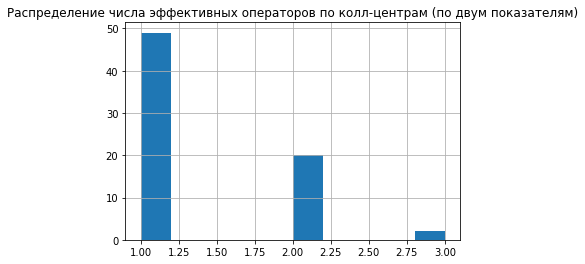

In [45]:
(operator_in_calls.query('calls_efficiency == "effective" and waiting_time_efficiency == "effective"').groupby('user_id')
 ['operator_id'].count().reset_index().sort_values(by='operator_id', ascending=False).hist('operator_id')
)
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —á–∏—Å–ª–∞ —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω—ã—Ö –æ–ø–µ—Ä–∞—Ç–æ—Ä–æ–≤ –ø–æ –∫–æ–ª–ª-—Ü–µ–Ω—Ç—Ä–∞–º (–ø–æ –¥–≤—É–º –ø–æ–∫–∞–∑–∞—Ç–µ–ª—è–º)');

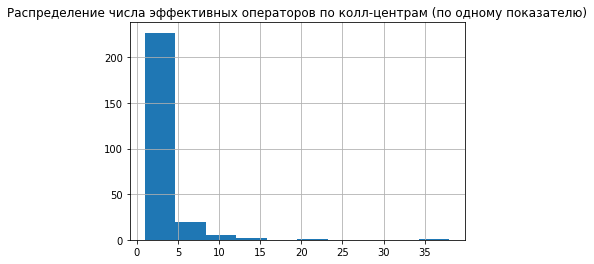

In [46]:
(operator_in_calls.query('calls_efficiency == "effective" or waiting_time_efficiency == "effective"').groupby('user_id')
 ['operator_id'].count().reset_index().sort_values(by='operator_id', ascending=False).hist('operator_id')
)
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —á–∏—Å–ª–∞ —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω—ã—Ö –æ–ø–µ—Ä–∞—Ç–æ—Ä–æ–≤ –ø–æ –∫–æ–ª–ª-—Ü–µ–Ω—Ç—Ä–∞–º (–ø–æ –æ–¥–Ω–æ–º—É –ø–æ–∫–∞–∑–∞—Ç–µ–ª—é)');

In [47]:
(operator_in_calls.query('calls_efficiency == "effective" or waiting_time_efficiency == "effective"').groupby('user_id')
 ['operator_id'].count().reset_index().sort_values(by='operator_id', ascending=False)).head(10)

user_id  operator_id
221   168187           38
137   167497           20
228   168252           14
60    166916           13
139   167521           11
128   167445           10
211   168091            9
173   167828            9
4     166405            9
237   168336            8

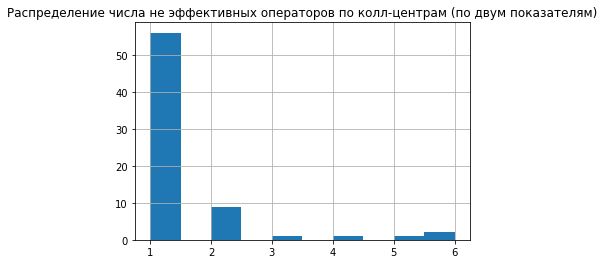

In [48]:
(operator_in_calls.query('calls_efficiency != "effective" and waiting_time_efficiency != "effective"').groupby('user_id')
 ['operator_id'].count().reset_index().sort_values(by='operator_id', ascending=False).hist('operator_id')
)
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —á–∏—Å–ª–∞ –Ω–µ —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω—ã—Ö –æ–ø–µ—Ä–∞—Ç–æ—Ä–æ–≤ –ø–æ –∫–æ–ª–ª-—Ü–µ–Ω—Ç—Ä–∞–º (–ø–æ –¥–≤—É–º –ø–æ–∫–∞–∑–∞—Ç–µ–ª—è–º)');

–ü–æ—Å–º–æ—Ç—Ä–∏–º —Å–∫–æ–ª—å–∫–æ –æ–ø–µ—Ä–∞—Ç–æ—Ä–æ–≤ —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω—ã –ø–æ –∫–∞–∂–¥–æ–º—É –ø—Ä–∏–∑–Ω–∞–∫—É:

In [49]:
(print('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–≤–æ–Ω–∫–æ–≤ –≤ –¥–µ–Ω—å, —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω—ã:',
    operator_in_calls.query('calls_efficiency=="effective"')['operator_id'].count()))
(print('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–≤–æ–Ω–∫–æ–≤ –≤ –¥–µ–Ω—å, –Ω–µ —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω—ã:',
    operator_in_calls.query('calls_efficiency!="effective"')['operator_id'].count()))
(print('–í—Ä–µ–º—è –æ–∂–∏–¥–∞–Ω–∏—è –Ω–∞ –ª–∏–Ω–∏–∏ –≤ –¥–µ–Ω—å, —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω—ã:',
    operator_in_calls.query('waiting_time_efficiency=="effective"')['operator_id'].count()))
(print('–í—Ä–µ–º—è –æ–∂–∏–¥–∞–Ω–∏—è –Ω–∞ –ª–∏–Ω–∏–∏ –≤ –¥–µ–Ω—å, –Ω–µ —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω—ã:',
    operator_in_calls.query('waiting_time_efficiency!="effective"')['operator_id'].count()))

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–≤–æ–Ω–∫–æ–≤ –≤ –¥–µ–Ω—å, —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω—ã: 597
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–≤–æ–Ω–∫–æ–≤ –≤ –¥–µ–Ω—å, –Ω–µ —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω—ã: 141
–í—Ä–µ–º—è –æ–∂–∏–¥–∞–Ω–∏—è –Ω–∞ –ª–∏–Ω–∏–∏ –≤ –¥–µ–Ω—å, —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω—ã: 138
–í—Ä–µ–º—è –æ–∂–∏–¥–∞–Ω–∏—è –Ω–∞ –ª–∏–Ω–∏–∏ –≤ –¥–µ–Ω—å, –Ω–µ —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω—ã: 600


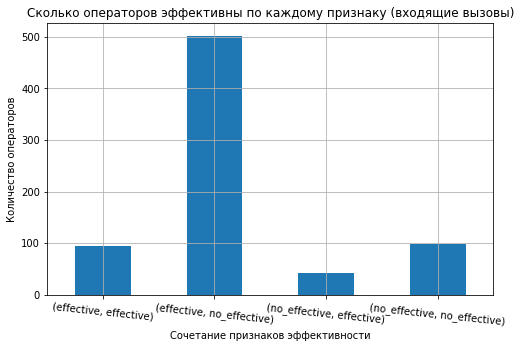

In [50]:
# –æ—Ç–æ–±—Ä–∞–∑–∏–º —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç—å –æ–ø–µ—Ä–∞—Ç–æ—Ä–æ–≤ –ø–æ –∫–∞–∂–¥–æ–º—É –ø—Ä–∏–∑–Ω–∞–∫—É: –≥—Ä–∞—Ñ–∏—á–µ—Å–∫–∏
plt.figure(figsize=(8, 5))
plt.title('–°–∫–æ–ª—å–∫–æ –æ–ø–µ—Ä–∞—Ç–æ—Ä–æ–≤ —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω—ã –ø–æ –∫–∞–∂–¥–æ–º—É –ø—Ä–∏–∑–Ω–∞–∫—É (–≤—Ö–æ–¥—è—â–∏–µ –≤—ã–∑–æ–≤—ã)')
(operator_in_calls.groupby(['calls_efficiency', 'waiting_time_efficiency'])['operator_id'].count()
 .plot(kind='bar', grid=True, ylabel='–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ–ø–µ—Ä–∞—Ç–æ—Ä–æ–≤', xlabel='–°–æ—á–µ—Ç–∞–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏', rot = -6));

In [51]:
# –¥–æ–±–∞–≤–∏–º –∏–Ω–¥–∏–∫–∞—Ç–æ—Ä "—É—Å–ø–µ–≤–∞–µ–º–æ—Å—Ç–∏" –æ–ø–µ—Ä–∞—Ç–æ—Ä–æ–≤
def what_to_do(row):
    waiting_time = row['waiting_time_efficiency']
    calls = row['calls_efficiency']
    if waiting_time == 'effective' and calls == 'effective':
        return '–ü—Ä–µ–º–∏—Ä–æ–≤–∞—Ç—å'
    if waiting_time == 'effective' or calls == 'effective':
        return '–ü—Ä–æ–≤–µ—Å—Ç–∏ –±–µ—Å–µ–¥—É/–æ–±—É—á–∏—Ç—å'
    if waiting_time != 'effective' and calls != 'effective':
        return '–ü—Ä–æ–≤–µ—Å—Ç–∏ –±–µ—Å–µ–¥—É/—É–≤–æ–ª–∏—Ç—å'
    
operator_in_calls['what_to_do'] = operator_in_calls.apply(what_to_do, axis=1) 

In [52]:
# —É–±–µ—Ä–µ–º –ª–∏—à–Ω–∏–µ —Å—Ç–æ–ª–±—Ü—ã –∏ –≤—ã–≤–µ–¥–µ–º –¥–∞–Ω–Ω—ã–µ 
results_in_calls = (operator_in_calls[[
    'user_id', 'operator_id', 'days_worked', 'calls_efficiency', 'waiting_time_efficiency', 'what_to_do'
]])
results_in_calls.head(10)

user_id  operator_id  days_worked calls_efficiency waiting_time_efficiency  \
0   166377       880020            7     no_effective               effective   
1   166377       880022            8     no_effective               effective   
2   166377       880026           18        effective               effective   
3   166377       880028           41        effective               effective   
4   166391       882476            3     no_effective            no_effective   
5   166391       882478            1        effective               effective   
6   166392       886892            1        effective            no_effective   
7   166392       891900           17        effective            no_effective   
8   166392       891906           29        effective            no_effective   
9   166399       886674            9     no_effective               effective   

                what_to_do  
0  –ü—Ä–æ–≤–µ—Å—Ç–∏ –±–µ—Å–µ–¥—É/–æ–±—É—á–∏—Ç—å  
1  –ü—Ä–æ–≤–µ—Å—Ç–∏ –±–µ—Å–µ–¥—É/–æ–±—É—á–∏—Ç—å  
2              –ü—Ä–µ–º–∏—Ä–æ–≤–∞—Ç—å  
3              –ü—Ä–µ–º–∏—Ä–æ–≤–∞—Ç—å  
4  –ü—Ä–æ–≤–µ—Å—Ç–∏ –±–µ—Å–µ–¥—É/—É–≤–æ–ª–∏—Ç—å  
5              –ü—Ä–µ–º–∏—Ä–æ–≤–∞—Ç—å  
6  –ü—Ä–æ–≤–µ—Å—Ç–∏ –±–µ—Å–µ–¥—É/–æ–±—É—á–∏—Ç—å  
7  –ü—Ä–æ–≤–µ—Å—Ç–∏ –±–µ—Å–µ–¥—É/–æ–±—É—á–∏—Ç—å  
8  –ü—Ä–æ–≤–µ—Å—Ç–∏ –±–µ—Å–µ–¥—É/–æ–±—É—á–∏—Ç—å  
9  –ü—Ä–æ–≤–µ—Å—Ç–∏ –±–µ—Å–µ–¥—É/–æ–±—É—á–∏—Ç—å

<div style="border:solid green 1px; padding: 10px">
    
* –≠—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω—ã—Ö –ø–æ –¥–≤—É–º –ø–æ–∫–∞–∑–∞—Ç–µ–ª—è–º –æ–ø–µ—Ä–∞—Ç–æ—Ä–æ–≤, –∫–∞–∫ –ø—Ä–∞–≤–∏–ª–æ, –ø–æ –æ–¥–Ω–æ–º—É –Ω–∞ –∫–æ–ª–ª-—Ü–µ–Ω—Ç—Ä, –µ—Å—Ç—å —Ç–∞–∫–∏–µ, –≥–¥–µ –ø–æ –¥–≤–∞ –∏ —Å–æ–≤—Å–µ–º –º–∞–ª–æ —Ç–∞–∫–∏—Ö, –≥–¥–µ –ø–æ —Ç—Ä–∏.
    
* –ü–æ –æ–¥–Ω–æ–º—É –∏–∑ –¥–≤—É—Ö –ø–æ–∫–∞–∑–∞—Ç–µ–ª–µ–π —ç—Ñ—Ñ–∫—Ç–∏–≤–Ω—ã 1-5 –æ–ø–µ—Ä–∞—Ç–æ—Ä–æ–≤, —Ä–µ–∂–µ –±–æ–ª—å—à–µ.
    
* –ù–µ —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω—ã—Ö –≤–æ–≤—Å–µ –ø–æ 1-2 –æ–ø–µ—Ä–∞—Ç–æ—Ä–∞ –Ω–∞ –∫–æ–ª–ª-—Ü–µ–Ω—Ç—Ä, –Ω–æ –µ—Å—Ç—å –∏ —Ç–∞–∫–∏–µ, –≥–¥–µ –∏—Ö –ø–æ 5 –∏ –±–æ–ª–µ–µ.

## –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏ –æ–ø–µ—Ä–∞—Ç–æ—Ä–æ–≤ –ø–æ –≤–Ω–µ—à–Ω–∏–º –∏—Å—Ö–æ–¥—è—â–∏–º –≤—ã–∑–æ–≤–∞–º


### –°—Ä–∞–≤–Ω–∏–º —Ñ–∞–∫—Ç–∏—á–µ—Å–∫–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–≤–æ–Ω–∫–æ–≤, –∫–æ—Ç–æ—Ä–æ–µ —Å–¥–µ–ª–∞–ª –∫–∞–∂–¥—ã–π –æ–ø–µ—Ä–∞—Ç–æ—Ä, —Å —á–∏—Å–ª–æ –≤—ã–∑–æ–≤–æ–≤, –∫–æ—Ç–æ—Ä—ã–µ –æ–ø–µ—Ä–∞—Ç–æ—Ä –º–æ–∂–µ—Ç —Å–¥–µ–ª–∞—Ç—å –≤ —Ç–µ—á–µ–Ω–∏–µ –¥–Ω—è

–í–æ–∑—å–º–µ–º –¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å –∑–≤–æ–Ω–∫–æ–≤, —Å–æ–≤–µ—Ä—à–µ–Ω–Ω—ã—Ö –æ–ø–µ—Ä–∞—Ç–æ—Ä–æ–º, –∏ —Ä–∞–∑–¥–µ–ª–∏–º –Ω–∞ —Å—Ä–µ–¥–Ω—é—é –ø—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å –∫–∞–∂–¥–æ–≥–æ –∑–≤–æ–Ω–∫–∞. –¢–∞–∫ –º—ã –ø–æ–ª—É—á–∏–º —á–∏—Å–ª–æ –≤—ã–∑–æ–≤–æ–≤, –∫–æ—Ç–æ—Ä—ã–µ –æ–ø–µ—Ä–∞—Ç–æ—Ä –º–æ–∂–µ—Ç —Å–¥–µ–ª–∞—Ç—å –≤ —Ç–µ—á–µ–Ω–∏–µ –¥–Ω—è, –∏ —Å—Ä–∞–≤–Ω–∏–º —Å —Ñ–∞–∫—Ç–∏—á–µ—Å–∫–∏–º —á–∏—Å–ª–æ–º –∑–≤–æ–Ω–∫–æ–≤ –≤ –¥–µ–Ω—å.

In [53]:
# –¥–æ–±–∞–≤–∏–º –¥–∞–Ω–Ω—ã–µ –ø–æ –¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –≤ —Ç–∞–±–ª–∏—Ü—É
duration_out_calls = (out_calls.query('is_missed_call == False').groupby(['user_id', 'operator_id'])
 .agg({'call_duration':'mean','total_call_duration': 'sum'}).reset_index())
duration_out_calls.columns = ['user_id', 'operator_id', 'mean_call_duration', 'total_call_duration']

operator_out_calls = operator_out_calls.merge(duration_out_calls, on=['user_id', 'operator_id'], how='left').fillna(0)

In [54]:
# –¥–æ–±–∞–≤–∏–º —Å—Ç–æ–ª–±–µ—Ü —Å–æ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–æ–º –∑–≤–æ–Ω–∫–æ–≤ –≤ –¥–µ–Ω—å –¥–ª—è –æ–ø–µ—Ä–∞—Ç–æ—Ä–∞
operator_out_calls['call_standard'] = (round(operator_out_calls['total_call_duration'] / 
                                            operator_out_calls['mean_call_duration'], 0).fillna(0))

In [55]:
# –¥–æ–±–∞–≤–∏–º —Å—Ç–æ–ª–±–µ—Ü —Å–æ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–æ–º –∑–≤–æ–Ω–∫–æ–≤ –≤ –¥–µ–Ω—å –¥–ª—è –æ–ø–µ—Ä–∞—Ç–æ—Ä–∞
operator_out_calls['call_standard'] = (round(operator_out_calls['total_call_duration'] / 
                                            operator_out_calls['mean_call_duration'], 0).fillna(0))

In [56]:
# –æ–ø—Ä–µ–¥–µ–ª–∏–º —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ –ª–∏ –æ–ø–µ—Ä–∞—Ç–æ—Ä—ã —Ä–∞–±–æ—Ç–∞—é—Ç –ø–æ –æ—Å—É—â–µ—Å—Ç–≤–ª–µ–Ω–∏—é –∑–≤–æ–Ω–∫–æ–≤
operator_out_calls['calls_efficiency'] = operator_out_calls.apply(calls_efficiency, axis=1) 

### –°—Ä–∞–≤–Ω–∏–º —Å—Ä–µ–¥–Ω—é—é –¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å –∑–≤–æ–Ω–∫–∞ –ø—Ä–∏ –∏—Å—Ö–æ–¥—è—â–µ–º –≤—ã–∑–æ–≤–µ —Å–æ —Å—Ä–µ–¥–Ω–µ–π –¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å—é —Ä–∞–∑–≥–æ–≤–æ—Ä–∞ –æ–ø–µ—Ä–∞—Ç–æ—Ä–∞ –∑–∞ –∑–≤–æ–Ω–æ–∫

–°—Ä–µ–¥–Ω–µ–µ –¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å —Ä–∞–∑–≥–æ–≤–æ—Ä–∞ –æ–ø–µ—Ä–∞—Ç–æ—Ä–∞ –∑–∞ –∑–≤–æ–Ω–æ–∫ –æ–ø—Ä–µ–¥–µ–ª—è–µ—Ç—Å—è –∫–∞–∫ —Å—É–º–º–∞ –≤—Ä–µ–º–µ–Ω–∏ —Ä–∞–∑–≥–æ–≤–æ—Ä–æ–≤ —Å —É—á–µ—Ç–æ–º –æ–∂–∏–¥–∞–Ω–∏—è –¥–µ–ª–µ–Ω–Ω–∞—è –Ω–∞  –≤—Å–µ –æ–±—Ä–∞–±–æ—Ç–∞–Ω–Ω—ã–µ –∑–∞ –æ—Ç—á–µ—Ç–Ω—ã–π –ø–µ—Ä–∏–æ–¥ –æ–ø–µ—Ä–∞—Ç–æ—Ä–æ–º –∑–≤–æ–Ω–∫–∏.

In [57]:
# –¥–æ–±–∞–≤–∏–º –¥–∞–Ω–Ω—ã–µ –ø–æ –¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –≤ —Ç–∞–±–ª–∏—Ü—É
operator_out_calls['duration_per_call'] = (round(operator_out_calls['total_call_duration'] / 
                                            operator_out_calls['calls_count'], 0).fillna(0))

In [58]:
# –¥–æ–±–∞–≤–∏–º —Å—Ç–æ–ª–±–µ—Ü —Å–æ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–æ–º –ø–æ –¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏
out_calls_df_duration = out_calls_df[['user_id', 'ttl_call_duration_per_call']]
out_calls_df_duration.columns = ['user_id', 'duration_standard']
operator_out_calls = operator_out_calls.merge(out_calls_df_duration, on='user_id', how='left')

In [59]:
# –¥–æ–±–∞–≤–∏–º –∏–Ω–¥–∏–∫–∞—Ç–æ—Ä —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏ –ø–æ –ø–æ–∫–∞–∑–∞—Ç–µ–ª—é
def duration_efficiency(row):
    duration = row['duration_per_call']
    reference = row['duration_standard']
    if duration >= reference:
        return 'effective'
    if duration < reference:
        return 'no_effective'
    
operator_out_calls['duration_efficiency'] = operator_out_calls.apply(duration_efficiency, axis=1) 

### **<font color="green"> –í—ã–≤–æ–¥ –ø–æ –ø–æ–∫–∞–∑–∞—Ç–µ–ª—è–º —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏ –æ–ø–µ—Ä–∞—Ç–æ—Ä–æ–≤ –Ω–∞ –∏—Å—Ö–æ–¥—è—â–∏—Ö –≤—ã–∑–æ–≤–∞—Ö </font>**

–ú—ã —Å–æ–±—Ä–∞–ª–∏ –æ–±–∞ –ø–æ–∫–∞–∑–∞—Ç–µ–ª—è –≤ —Ç–∞–±–ª–∏—Ü—É —Å –æ–ø–µ—Ä–∞—Ç–æ—Ä–∞–º–∏ `operator_Out_calls`, –ø–æ—Å–º–æ—Ç—Ä–∏–º –∫–∞–∫ –º–Ω–æ–≥–æ –∏–∑ –Ω–∏—Ö —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—Ç –∏–º.

–î–æ–±–∞–≤–∏–º –µ—â–µ –æ–¥–∏–Ω —Å—Ç–æ–ª–±–µ—Ü –¥–ª—è –∫–∞—Ç–µ–≥–æ—Ä–∏–∑–∞—Ü–∏–∏ "—É—Å–ø–µ–≤–∞–µ–º–æ—Å—Ç–∏" –æ–ø–µ—Ä–∞—Ç–æ—Ä–æ–≤.

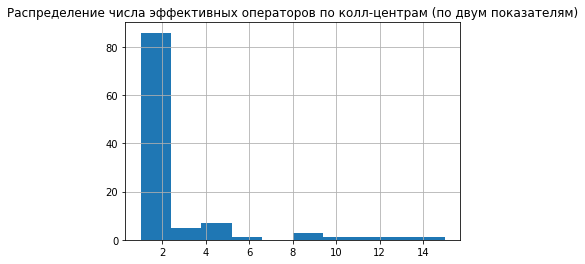

In [60]:
(operator_out_calls.query('calls_efficiency == "effective" and duration_efficiency == "effective"').groupby('user_id')
 ['operator_id'].count().reset_index().sort_values(by='operator_id', ascending=False).hist('operator_id')
)
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —á–∏—Å–ª–∞ —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω—ã—Ö –æ–ø–µ—Ä–∞—Ç–æ—Ä–æ–≤ –ø–æ –∫–æ–ª–ª-—Ü–µ–Ω—Ç—Ä–∞–º (–ø–æ –¥–≤—É–º –ø–æ–∫–∞–∑–∞—Ç–µ–ª—è–º)');

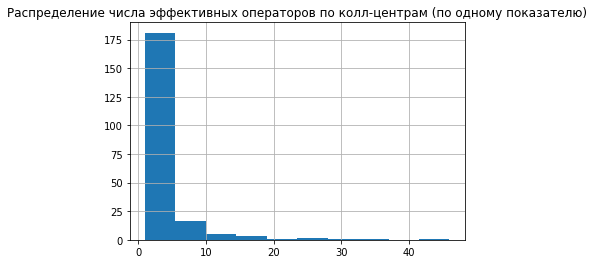

In [61]:
(operator_out_calls.query('calls_efficiency == "effective" or duration_efficiency == "effective"').groupby('user_id')
 ['operator_id'].count().reset_index().sort_values(by='operator_id', ascending=False).hist('operator_id')
)
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —á–∏—Å–ª–∞ —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω—ã—Ö –æ–ø–µ—Ä–∞—Ç–æ—Ä–æ–≤ –ø–æ –∫–æ–ª–ª-—Ü–µ–Ω—Ç—Ä–∞–º (–ø–æ –æ–¥–Ω–æ–º—É –ø–æ–∫–∞–∑–∞—Ç–µ–ª—é)');

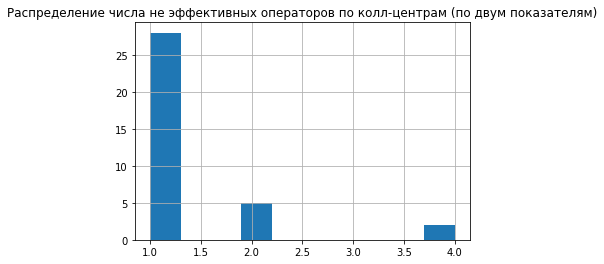

In [62]:
(operator_out_calls.query('calls_efficiency != "effective" and duration_efficiency != "effective"').groupby('user_id')
 ['operator_id'].count().reset_index().sort_values(by='operator_id', ascending=False).hist('operator_id')
)
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —á–∏—Å–ª–∞ –Ω–µ —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω—ã—Ö –æ–ø–µ—Ä–∞—Ç–æ—Ä–æ–≤ –ø–æ –∫–æ–ª–ª-—Ü–µ–Ω—Ç—Ä–∞–º (–ø–æ –¥–≤—É–º –ø–æ–∫–∞–∑–∞—Ç–µ–ª—è–º)');

–ü–æ—Å–º–æ—Ç—Ä–∏–º —Å–∫–æ–ª—å–∫–æ –æ–ø–µ—Ä–∞—Ç–æ—Ä–æ–≤ —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω—ã –ø–æ –∫–∞–∂–¥–æ–º—É –ø—Ä–∏–∑–Ω–∞–∫—É:

In [63]:
(print('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–≤–æ–Ω–∫–æ–≤ –≤ –¥–µ–Ω—å, —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω—ã:',
    operator_out_calls.query('calls_efficiency=="effective"')['operator_id'].count()))
(print('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–≤–æ–Ω–∫–æ–≤ –≤ –¥–µ–Ω—å, –Ω–µ —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω—ã:',
    operator_out_calls.query('calls_efficiency!="effective"')['operator_id'].count()))
(print('–î–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å –∑–≤–æ–Ω–∫–∞, —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω—ã:',
    operator_out_calls.query('duration_efficiency=="effective"')['operator_id'].count()))
(print('–î–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å –∑–≤–æ–Ω–∫–∞, –Ω–µ —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω—ã:',
    operator_out_calls.query('duration_efficiency!="effective"')['operator_id'].count()))

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–≤–æ–Ω–∫–æ–≤ –≤ –¥–µ–Ω—å, —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω—ã: 781
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–≤–æ–Ω–∫–æ–≤ –≤ –¥–µ–Ω—å, –Ω–µ —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω—ã: 52
–î–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å –∑–≤–æ–Ω–∫–∞, —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω—ã: 246
–î–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å –∑–≤–æ–Ω–∫–∞, –Ω–µ —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω—ã: 587


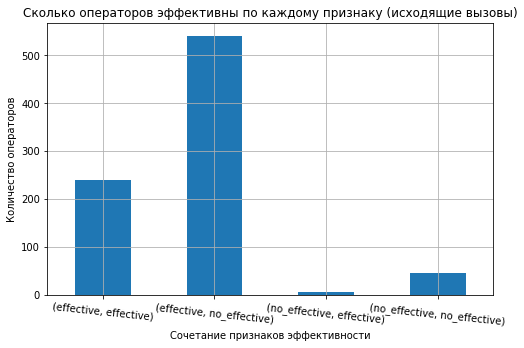

In [64]:
# –æ—Ç–æ–±—Ä–∞–∑–∏–º —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç—å –æ–ø–µ—Ä–∞—Ç–æ—Ä–æ–≤ –ø–æ –∫–∞–∂–¥–æ–º—É –ø—Ä–∏–∑–Ω–∞–∫—É: –≥—Ä–∞—Ñ–∏—á–µ—Å–∫–∏
plt.figure(figsize=(8, 5))
plt.title('–°–∫–æ–ª—å–∫–æ –æ–ø–µ—Ä–∞—Ç–æ—Ä–æ–≤ —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω—ã –ø–æ –∫–∞–∂–¥–æ–º—É –ø—Ä–∏–∑–Ω–∞–∫—É (–∏—Å—Ö–æ–¥—è—â–∏–µ –≤—ã–∑–æ–≤—ã)')
(operator_out_calls.groupby(['calls_efficiency', 'duration_efficiency'])['operator_id'].count()
 .plot(kind='bar', grid=True, ylabel='–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ–ø–µ—Ä–∞—Ç–æ—Ä–æ–≤', xlabel='–°–æ—á–µ—Ç–∞–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏', rot = -6));

In [65]:
# –¥–æ–±–∞–≤–∏–º –∏–Ω–¥–∏–∫–∞—Ç–æ—Ä "—É—Å–ø–µ–≤–∞–µ–º–æ—Å—Ç–∏" –æ–ø–µ—Ä–∞—Ç–æ—Ä–æ–≤
def what_to_do_v2(row):
    duration = row['duration_efficiency']
    calls = row['calls_efficiency']
    if duration == 'effective' and calls == 'effective':
        return '–ü—Ä–µ–º–∏—Ä–æ–≤–∞—Ç—å'
    if duration == 'effective' or calls == 'effective':
        return '–ü—Ä–æ–≤–µ—Å—Ç–∏ –±–µ—Å–µ–¥—É/–æ–±—É—á–∏—Ç—å'
    if duration != 'effective' and calls != 'effective':
        return '–ü—Ä–æ–≤–µ—Å—Ç–∏ –±–µ—Å–µ–¥—É/—É–≤–æ–ª–∏—Ç—å'
    
operator_out_calls['what_to_do'] = operator_out_calls.apply(what_to_do_v2, axis=1) 

In [66]:
# —É–±–µ—Ä–µ–º –ª–∏—à–Ω–∏–µ —Å—Ç–æ–ª–±—Ü—ã –∏ –≤—ã–≤–µ–¥–µ–º –¥–∞–Ω–Ω—ã–µ 
results_out_calls = (operator_out_calls[[
    'user_id', 'operator_id', 'days_worked', 'calls_efficiency', 'duration_efficiency', 'what_to_do'
]])
results_out_calls.head(10)

user_id  operator_id  days_worked calls_efficiency duration_efficiency  \
0   166377       880020           10        effective        no_effective   
1   166377       880022           54        effective           effective   
2   166377       880026          151        effective        no_effective   
3   166377       880028          154        effective        no_effective   
4   166377       881278            5        effective        no_effective   
5   166405       882684          101        effective           effective   
6   166405       882686          150        effective        no_effective   
7   166405       882688            7        effective           effective   
8   166405       882690           40        effective        no_effective   
9   166405       902510           94        effective        no_effective   

                what_to_do  
0  –ü—Ä–æ–≤–µ—Å—Ç–∏ –±–µ—Å–µ–¥—É/–æ–±—É—á–∏—Ç—å  
1              –ü—Ä–µ–º–∏—Ä–æ–≤–∞—Ç—å  
2  –ü—Ä–æ–≤–µ—Å—Ç–∏ –±–µ—Å–µ–¥—É/–æ–±—É—á–∏—Ç—å  
3  –ü—Ä–æ–≤–µ—Å—Ç–∏ –±–µ—Å–µ–¥—É/–æ–±—É—á–∏—Ç—å  
4  –ü—Ä–æ–≤–µ—Å—Ç–∏ –±–µ—Å–µ–¥—É/–æ–±—É—á–∏—Ç—å  
5              –ü—Ä–µ–º–∏—Ä–æ–≤–∞—Ç—å  
6  –ü—Ä–æ–≤–µ—Å—Ç–∏ –±–µ—Å–µ–¥—É/–æ–±—É—á–∏—Ç—å  
7              –ü—Ä–µ–º–∏—Ä–æ–≤–∞—Ç—å  
8  –ü—Ä–æ–≤–µ—Å—Ç–∏ –±–µ—Å–µ–¥—É/–æ–±—É—á–∏—Ç—å  
9  –ü—Ä–æ–≤–µ—Å—Ç–∏ –±–µ—Å–µ–¥—É/–æ–±—É—á–∏—Ç—å

<div style="border:solid green 1px; padding: 10px">
    
–≠—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω—ã—Ö –ø–æ –¥–≤—É–º –ø–æ–∫–∞–∑–∞—Ç–µ–ª—è–º –æ–ø–µ—Ä–∞—Ç–æ—Ä–æ–≤, –∫–∞–∫ –ø—Ä–∞–≤–∏–ª–æ, –ø–æ –æ–¥–Ω–æ–º—É/–¥–≤–∞ –Ω–∞ –∫–æ–ª–ª-—Ü–µ–Ω—Ç—Ä, –Ω–æ –µ—Å—Ç—å –∏ —Ç–∞–∫–∏–µ, –≥–¥–µ –ø–æ —Ç—Ä–∏ –∏ –±–æ–ª—å—à–µ.
    
–ü–æ –æ–¥–Ω–æ–º—É –∏–∑ –¥–≤—É—Ö –ø–æ–∫–∞–∑–∞—Ç–µ–ª–µ–π —ç—Ñ—Ñ–∫—Ç–∏–≤–Ω—ã 1-5 –æ–ø–µ—Ä–∞—Ç–æ—Ä–æ–≤, —Ä–µ–∂–µ –±–æ–ª—å—à–µ.
    
–ù–µ —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω—ã—Ö –≤–æ–≤—Å–µ –ø–æ 1–æ–ø–µ—Ä–∞—Ç–æ—Ä—É –Ω–∞ –∫–æ–ª–ª-—Ü–µ–Ω—Ç—Ä, –Ω–æ –µ—Å—Ç—å –∏ —Ç–∞–∫–∏–µ, –≥–¥–µ –∏—Ö –±–æ–ª—å—à–µ.

## –ü—Ä–æ–≤–µ—Ä–∫–∞ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏—Ö –≥–∏–ø–æ—Ç–µ–∑

### –ò—Å—Ö–æ–¥—è—â–∏–µ –∑–≤–æ–Ω–∫–∏ –∫–æ–ª–ª-—Ü–µ–Ω—Ç–æ–≤ —á–∞—â–µ –ø—Ä–æ–ø—É—Å–∫–∞—é—Ç —á–µ–º –æ—Ç–≤–µ—á–∞—é—Ç –Ω–∞ –Ω–∏—Ö

–ù—É–∂–Ω–æ –ø—Ä–æ–≤–µ—Å—Ç–∏ —Å—Ä–∞–≤–Ω–µ–Ω–∏–µ –∏—Å—Ö–æ–¥—è—â–∏—Ö –∑–≤–æ–Ω–∫–æ–≤ –ø–æ –∫–æ–ª–ª-—Ü–µ–Ω—Ç—Ä–∞–º –∏ –ø–æ–Ω—è—Ç—å –¥–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ –ª–∏ –∏—Ö —á–∞—â–µ –ø—Ä–µ–¥–ø–æ—á–∏—Ç–∞—é—Ç –ø—Ä–æ–ø—É—Å–∫–∞—Ç—å, —á–µ–º –æ—Ç–≤–µ—á–∞—Ç—å –Ω–∞ –Ω–∏—Ö.

---
**–û–ø—Ä–µ–¥–µ–ª–∏–º —Ñ–æ—Ä–º—É–ª–∏—Ä–æ–≤–∫—É –¥–ª—è –Ω—É–ª–µ–≤–æ–π –∏ –∞–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–Ω–æ–π –≥–∏–ø–æ—Ç–µ–∑—ã:**

–ù—É–ª–µ–≤–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞ - –∏—Å—Ö–æ–¥—è—â–∏–µ –æ—Ç –∫–æ–ª–ª-—Ü–µ–Ω—Ç—Ä–æ–≤ –∑–≤–æ–Ω–∫–∏ –ø—Ä–µ–¥–ø–æ—á–∏—Ç–∞—é—Ç –ø—Ä–æ–ø—É—Å–∫–∞—Ç—å.

–ê–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–Ω–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞ - –Ω–∞ –∏—Å—Ö–æ–¥—è—â–∏–µ –æ—Ç –∫–æ–ª–ª-—Ü–µ–Ω—Ç—Ä–æ–≤ –∑–≤–æ–Ω–∫–∏ –ø—Ä–µ–¥–ø–æ—á–∏—Ç–∞—é—Ç –æ—Ç–≤–µ—á–∞—Ç—å.

---
–ü–æ—Ä–æ–≥–æ–≤–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ alpha - –∫—Ä–∏—Ç–∏—á–µ—Å–∫–∏–π —É—Ä–æ–≤–µ–Ω—å —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–æ–π –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏, –ø—Ä–∏–º–µ–º –∫–∞–∫ 0,05 (5%). –ï—Å–ª–∏ p-value –æ–∫–∞–∂–µ—Ç—Å—è –º–µ–Ω—å—à–µ –Ω–µ–≥–æ - –æ—Ç–≤–µ—Ä–≥–Ω–µ–º –≥–∏–ø–æ—Ç–µ–∑—É.

*P-value ‚Äî —ç—Ç–æ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –æ—à–∏–±–∫–∏ –ø—Ä–∏ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–∏ –Ω—É–ª–µ–≤–æ–π –≥–∏–ø–æ—Ç–µ–∑—ã.*

–î–ª—è –ø—Ä–æ–≤–µ—Ä–∫–∏ –≥–∏–ø–æ—Ç–µ–∑—ã –∏—Å–ø–æ–ª—å–∑—É–µ–º —Ç–∞–±–ª–∏—Ü—É `out_calls`. C–æ–±–µ—Ä–µ–º –∏–∑ –Ω–µ–µ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º —Å–æ —Å—Ç–æ–ª–±—Ü–∞–º–∏:
* `user_id` - –∏–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ç–æ—Ä –∫–æ–ª–ª-—Ü–µ–Ω—Ç—Ä–∞;
* `is_missed_call` - –ø—Ä–∏–∑–Ω–∞–∫ —Ç–æ–≥–æ –ø—Ä–æ–ø—É—â–µ–Ω –ª–∏ –≤—ã–∑–æ–≤:
    * `missed_calls` - –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –≤—ã–∑–æ–≤—ã;
    * `answered_calls` - –æ—Ç–≤–µ—á–µ–Ω–Ω—ã–µ –≤—ã–∑–æ–≤—ã;
* `calls_count` - –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–≤–æ–Ω–∫–æ–≤.

In [67]:
#—Å–æ–±–∏—Ä–∞–µ–º —Ç–∞–±–ª–∏—Ü—É
first_hypothesis = (out_calls.pivot_table(index=['user_id', 'is_missed_call'], values='calls_count', aggfunc='sum')
                    .reset_index())
first_hypothesis['is_missed_call'] = (first_hypothesis['is_missed_call'].astype('str')
                                      .replace(['False', 'True'], ['answered_calls', 'missed_calls']))
first_hypothesis = first_hypothesis.replace(['False', 'True'], ['answered_calls', 'missed_calls'])
#first_hypothesis.head(10)

In [68]:
# –ø—Ä–æ–≤–µ—Ä–∫–∞ –ù–æ
alpha = 0.05
results = st.ttest_ind(
    first_hypothesis.query('is_missed_call == "answered_calls"')['calls_count'], 
    first_hypothesis.query('is_missed_call == "missed_calls"')['calls_count']
)
print('p-–∑–Ω–∞—á–µ–Ω–∏–µ: ', results.pvalue)

if (results.pvalue < alpha):
    print("–û—Ç–≤–µ—Ä–≥–∞–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É")
else:

    print("–ù–µ –ø–æ–ª—É—á–∏–ª–æ—Å—å –æ—Ç–≤–µ—Ä–≥–Ω—É—Ç—å –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É")

p-–∑–Ω–∞—á–µ–Ω–∏–µ:  0.8628757121538234
–ù–µ –ø–æ–ª—É—á–∏–ª–æ—Å—å –æ—Ç–≤–µ—Ä–≥–Ω—É—Ç—å –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É


In [69]:
# –ø–æ—Å—á–∏—Ç–∞–µ–º –Ω–∞ —Å–∫–æ–ª—å–∫–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –±–æ–ª—å—à–µ —á–µ–º –æ—Ç–≤–µ—á–µ–Ω–Ω—ã—Ö
(first_hypothesis.query('is_missed_call == "missed_calls"')['calls_count'].sum()
 - first_hypothesis.query('is_missed_call == "answered_calls"')['calls_count'].sum())

22234

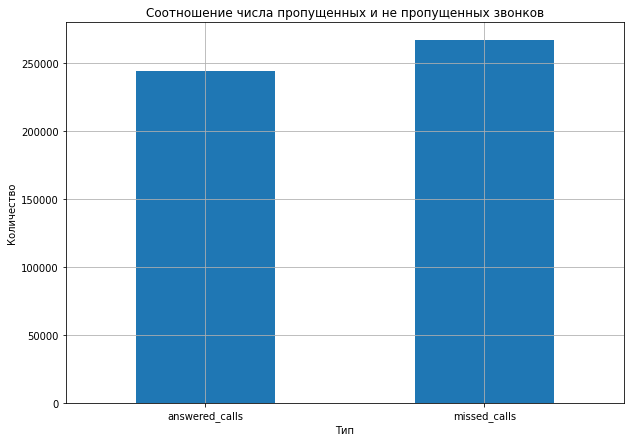

In [70]:
# –ø–æ—Å—Ç—Ä–æ–∏–º –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—é —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏—è
plt.figure(figsize=(10, 7))
plt.title('C–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ —á–∏—Å–ª–∞ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∏ –Ω–µ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–≤–æ–Ω–∫–æ–≤')
(first_hypothesis.groupby('is_missed_call')['calls_count']
 .sum().plot(kind='bar', grid=True, ylabel='–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ', xlabel='–¢–∏–ø', rot = 0));

<div style="border:solid green 1px; padding: 10px">
    
–ü–æ–ª—É—á–µ–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ p-value –≥–æ–≤–æ—Ä–∏—Ç –æ —Ç–æ–º, —á—Ç–æ —Ö–æ—Ç—è –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∏ –æ—Ç–≤–µ—á–µ–Ω–Ω—ã—Ö –∏—Å—Ö–æ–¥—è—â–∏—Ö –≤—ã–∑–æ–≤–æ–≤ –¥–ª—è –∫–æ–ª–ª-—Ü–µ–Ω—Ç—Ä–æ–≤  –Ω–µ–æ–¥–∏–Ω–∞–∫–æ–≤–∞, —Å –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å—é —á—É—Ç—å –±–æ–ª—å—à–µ 86% (—á—Ç–æ —Å–æ—Å—Ç–∞–≤–ª—è–µ—Ç –Ω–∞–º–Ω–æ–≥–æ –±–æ–ª—å—à–µ –ø–æ–ª–æ–≤–∏–Ω—ã —Å–ª—É—á–∞–µ–≤) —Ç–∞–∫–æ–µ –∏–ª–∏ –±–æ–ª—å—à–µ–µ —Ä–∞–∑–ª–∏—á–∏–µ –º–æ–∂–Ω–æ –ø–æ–ª—É—á–∏—Ç—å —Å–ª—É—á–∞–π–Ω–æ.–¢–∞–∫–∞—è –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å —Å–ª—É—á–∞–π–Ω–æ –ø–æ–ª—É—á–∏—Ç—å —Ä–∞–∑–ª–∏—á–∏–µ –≤ –∑–Ω–∞—á–µ–Ω–∏—è—Ö –ø–æ–∫–∞–∑–∞—Ç–µ–ª—è, –¥–∞–µ—Ç –≤–æ–∑–º–æ–∂—Å—Ç—å –∑–∞–¥—É–º–∞—Ç—å—Å—è –æ –≤–æ–∑–º–æ–∂–Ω–æ–º –∑–Ω–∞—á–∏–º–æ–º —Ä–∞–∑–ª–∏—á–∏–∏ –≤ –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ –ø—Ä–∏–Ω—è—Ç—ã—Ö –∏–ª–∏ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–≤–æ–Ω–∫–æ–≤ –æ—Ç –æ–ø–µ—Ä–∞—Ç–æ—Ä–æ–≤ –∫–æ–ª–ª-—Ü–µ–Ω—Ç—Ä–æ–≤.

–°—É–º–º–∞—Ä–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –≤—ã–∑–æ–≤–æ–≤ –æ—Ç –æ–ø–µ—Ä–∞—Ç–æ—Ä–æ–≤ –∫–æ–ª–ª-—Ü–µ–Ω—Ç—Ä–æ–≤ –ø—Ä–µ–≤—ã—à–∞–µ—Ç –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Ç–≤–µ—Ç–æ–≤ –Ω–∞ –∏—Ö –∑–≤–æ–Ω–∫–∏ –Ω–∞ 22234 –≤—ã–∑–æ–≤–∞ –∑–∞ –∞–Ω–∞–ª–∏–∑–∏—Ä—É–µ–º—ã–π –ø–µ—Ä–∏–æ–¥.

###  –ü—Ä–∏ –≤—Ö–æ–¥—è—â–∏—Ö –æ–±—Ä–∞—â–µ–Ω–∏—è—Ö, –∏–∑-–∑–∞ –¥–æ–ª–≥–æ–≥–æ –≤—Ä–µ–º–µ–Ω–∏ –æ–∂–∏–¥–∞–Ω–∏—è, —á–∞—Å—Ç–æ –Ω–µ –¥–æ–∂–∏–¥–∞—é—Ç—Å—è –Ω–∞–∑–Ω–∞—á–µ–Ω–∏—è –æ–ø–µ—Ä–∞—Ç–æ—Ä–∞

–ù—É–∂–Ω–æ –ø—Ä–æ–≤–µ—Å—Ç–∏ —Å—Ä–∞–≤–Ω–µ–Ω–∏–µ –≤—Ö–æ–¥—è—â–∏—Ö –∑–≤–æ–Ω–∫–æ–≤ –ø–æ –∫–æ–ª–ª-—Ü–µ–Ω—Ç—Ä–∞–º –∏ –ø–æ–Ω—è—Ç—å –¥–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ –ª–∏ –∏–∑-–∑–∞ –¥–æ–ª–≥–æ–≥–æ –≤—Ä–µ–º–µ–Ω–∏ –æ–∂–∏–¥–∞–Ω–∏—è –Ω–∞ –ª–∏–Ω–∏–∏, –∫–ª–∏–µ–Ω—Ç—ã —á–∞—Å—Ç–æ –Ω–µ –¥–æ–∂–∏–¥–∞—é—Ç—Å—è –Ω–∞–∑–Ω–∞—á–µ–Ω–∏—è –æ–ø–µ—Ä–∞—Ç–æ—Ä–∞.

---
**–û–ø—Ä–µ–¥–µ–ª–∏–º —Ñ–æ—Ä–º—É–ª–∏—Ä–æ–≤–∫—É –¥–ª—è –Ω—É–ª–µ–≤–æ–π –∏ –∞–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–Ω–æ–π –≥–∏–ø–æ—Ç–µ–∑—ã:**

–ù—É–ª–µ–≤–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞ - –¥–æ–ª–≥–æ–µ –≤—Ä–µ–º—è –æ–∂–∏–¥–∞–Ω–∏—è –Ω–∞ –ª–∏–Ω–∏–∏ –Ω–µ –≤–ª–∏—è–µ—Ç –Ω–∞ —Ä–µ—à–∏–º–æ—Å—Ç—å –∫–ª–∏–µ–Ω—Ç–æ–≤ –¥–æ–∂–¥–∞—Ç—å—Å—è –æ—Ç–≤–µ—Ç–∞ –æ–ø–µ—Ä–∞—Ç–æ—Ä–∞.

–ê–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–Ω–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞ - –∏–∑-–∑–∞ –¥–æ–ª–≥–æ–≥–æ –≤—Ä–µ–º–µ–Ω–∏ –æ–∂–∏–¥–∞–Ω–∏—è –Ω–∞ –ª–∏–Ω–∏–∏ –∑–≤–æ–Ω–∫–∏ –Ω–µ –¥–æ—Ö–æ–¥—è—Ç –¥–æ –Ω–∞–∑–Ω–∞—á–µ–Ω–∏—è –æ–ø–µ—Ä–∞—Ç–æ—Ä–∞.

---
–ü–æ—Ä–æ–≥–æ–≤–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ alpha - –∫—Ä–∏—Ç–∏—á–µ—Å–∫–∏–π —É—Ä–æ–≤–µ–Ω—å —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–æ–π –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏, –ø—Ä–∏–º–µ–º –∫–∞–∫ 0,05 (5%). –ï—Å–ª–∏ p-value –æ–∫–∞–∂–µ—Ç—Å—è –º–µ–Ω—å—à–µ –Ω–µ–≥–æ - –æ—Ç–≤–µ—Ä–≥–Ω–µ–º –≥–∏–ø–æ—Ç–µ–∑—É.

–í —Å–∞–º–æ–º –ª—É—á—à–µ–º —Å–ª—É—á–∞–µ –æ—Ç–≤–µ—á–∞—Ç—å –Ω–∞ –∑–≤–æ–Ω–æ–∫ –æ–ø–µ—Ä–∞—Ç–æ—Ä—É —Å–ª–µ–¥—É–µ—Ç –≤ —Ç–µ—á–µ–Ω–∏–µ 20 —Å–µ–∫—É–Ω–¥, 30 —Å–µ–∫—É–Ω–¥ ‚Äì –ø–æ–∫–∞–∑–∞—Ç–µ–ª—å –ø–æ—Ö—É–∂–µ, –∞ –≤–æ—Ç –æ–∂–∏–¥–∞–Ω–∏–µ –∫–ª–∏–µ–Ω—Ç–∞ –¥–ª–∏–Ω–æ—é –≤ –º–∏–Ω—É—Ç—É –∏ –±–æ–ª–µ–µ –≤–æ–≤—Å–µ —Å—á–∏—Ç–∞–µ—Ç—Å—è –Ω–µ–¥–æ–ø—É—Å—Ç–∏–º—ã–º. 

–û–≥—Ä–∞–Ω–∏—á–∏–º –¥–∞–Ω–Ω—ã–µ –ø–æ—Ä–æ–≥–æ–º –æ–∂–∏–¥–∞–Ω–∏—è –Ω–∞ –ª–∏–Ω–∏–∏ –±–æ–ª—å—à–µ 20 —Å–µ–∫—É–Ω–¥ –∏ –ø–æ—Å—á–∏—Ç–∞–µ–º —Å–∫–æ–ª—å–∫–æ –∑–≤–æ–Ω–∫–æ–≤ –¥–æ—Å—Ç–∏–≥–ª–æ –æ–ø–µ—Ä–∞—Ç–æ—Ä–∞, –∞ —Å–∫–æ–ª—å–∫–æ "—Å–æ—Ä–≤–∞–ª–∏—Å—å" –¥–æ –Ω–∞–∑–Ω–∞—á–µ–Ω–∏—è –æ–ø–µ—Ä–∞—Ç–æ—Ä–∞ –Ω–∞ –∑–≤–æ–Ω–æ–∫.

C–æ–±–µ—Ä–µ–º –∏–∑ –Ω–µ–µ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º, –æ–≥—Ä–∞–Ω–∏—á–∏–≤ —Ç–∞–±–ª–∏—Ü—É —Å–æ —Å—Ç–æ–ª–±—Ü–∞–º–∏:
* `user_id` - –∏–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ç–æ—Ä –∫–æ–ª–ª-—Ü–µ–Ω—Ç—Ä–∞;
* `operator_id` - –∏–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ç–æ—Ä –æ–ø–µ—Ä–∞—Ç–æ—Ä–∞;
* `is_missed_call` - –ø—Ä–∏–∑–Ω–∞–∫ —Ç–æ–≥–æ –ø—Ä–æ–ø—É—â–µ–Ω –ª–∏ –≤—ã–∑–æ–≤:
    - `True` - –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –≤—ã–∑–æ–≤—ã;
    - `False` - –ø—Ä–∏–Ω—è—Ç—ã–µ –≤—ã–∑–æ–≤—ã;
* `calls_count` - –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–≤–æ–Ω–∫–æ–≤.

–î–ª—è –∑–≤–æ–Ω–∫–æ–≤ –±–µ–∑ –æ–ø–µ—Ä–∞—Ç–æ—Ä–∞ –≤ —Å—Ç–æ–ª–±—Ü–µ `is_missed_call` –æ—Å—Ç–∞–≤–∏–º —Ç–æ–ª—å–∫–æ –∑–Ω–∞—á–µ–Ω–∏—è `True`, —Ç.–∫. –ø—Ä–∏–Ω—è—Ç—ã–µ –∑–≤–æ–Ω–∫–∏ –±–µ–∑ –Ω–∞–∑–Ω–∞—á–µ–Ω–Ω–æ–≥–æ –Ω–∞ –Ω–∏—Ö –æ–ø–µ—Ä–∞—Ç–æ—Ä–∞ - —ç—Ç–æ, —Å–∫–æ—Ä–µ–µ –≤—Å–µ–≥–æ, —Ç–µ—Ö. —Å–±–æ–π.

In [71]:
second_hypothesis = (df.query('direction == "in" and internal==False and waiting_time > 20')
                     [['user_id', 'operator_id', 'is_missed_call', 'calls_count']])
second_hypothesis = (second_hypothesis
 .pivot_table(index=['user_id', 'operator_id', 'is_missed_call'], values='calls_count', aggfunc='sum').reset_index())

In [72]:
second_hypothesis = (second_hypothesis.query(
    '(operator_id == 0 and is_missed_call == True) or operator_id != 0'))

In [73]:
# –ø—Ä–æ–≤–µ—Ä–∫–∞ –ù–æ
alpha = 0.05
results = st.ttest_ind(
    second_hypothesis.query('operator_id == 0')['calls_count'], 
    second_hypothesis.query('operator_id != 0')['calls_count']
)
print('p-–∑–Ω–∞—á–µ–Ω–∏–µ: ', results.pvalue)

if (results.pvalue < alpha):
    print("–û—Ç–≤–µ—Ä–≥–∞–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É")
else:

    print("–ù–µ –ø–æ–ª—É—á–∏–ª–æ—Å—å –æ—Ç–≤–µ—Ä–≥–Ω—É—Ç—å –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É")

p-–∑–Ω–∞—á–µ–Ω–∏–µ:  0.0007865479950672894
–û—Ç–≤–µ—Ä–≥–∞–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É


In [74]:
# –ø–æ—Å—á–∏—Ç–∞–µ–º –Ω–∞ —Å–∫–æ–ª—å–∫–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –±–æ–ª—å—à–µ —á–µ–º –æ—Ç–≤–µ—á–µ–Ω–Ω—ã—Ö
(second_hypothesis.query('operator_id == 0')['calls_count'].sum()
 - second_hypothesis.query('operator_id != 0')['calls_count'].sum())

9993

In [75]:
# –ø–æ—Å—Ç—Ä–æ–∏–º –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—é —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏—è
second_hypothesis['is_missed_call'] = (
second_hypothesis['is_missed_call'].astype('str').replace(['False', 'True'], ['assigned', 'no_assigned']))
plt.figure(figsize=(10, 7))
plt.title('C–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ —á–∏—Å–ª–∞ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∏ –Ω–µ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–≤–æ–Ω–∫–æ–≤')
(second_hypothesis.groupby('is_missed_call')['calls_count']
 .sum().plot(kind='bar', grid=True, ylabel='–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ', xlabel='–¢–∏–ø', rot = 0));

<div style="border:solid green 1px; padding: 10px">
    
–ó–Ω–∞—á–µ–Ω–∏–µ p-value –≥–æ–≤–æ—Ä–∏—Ç –æ —Ç–æ–º, —á—Ç–æ —Ç–∞–∫–æ–µ –∏–ª–∏ –±–æ–ª—å—à–µ–µ —Ä–∞–∑–ª–∏—á–∏–µ –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏ –Ω–µ –≤–æ–∑–º–æ–∂–Ω–æ –ø–æ–ª—É—á–∏—Ç—å —Å–ª—É—á–∞–π–Ω–æ. –≠—Ç–æ –¥–∞–µ—Ç –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å –¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥ –æ –∑–Ω–∞—á–∏–º–æ–º —Ä–∞–∑–ª–∏—á–∏–∏ –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –Ω–∞–∑–Ω–∞—á–µ–Ω–∏—è –æ–ø–µ—Ä–∞—Ç–æ—Ä–∞ –æ—Ç –¥–ª–∏—Ç–µ–Ω–æ—Å—Ç–∏ –æ–∂–∏–¥–∞–Ω–∏—è –Ω–∞ –ª–∏–Ω–∏–∏.

9993 –∑–≤–æ–Ω–∫–∞ "—Å–æ—Ä–≤–∞–ª–∏—Å—å" –¥–æ –Ω–∞–∑–Ω–∞—á–µ–Ω–∏—è –æ–ø–µ—Ä–∞—Ç–æ—Ä–∞ –Ω–∞ –Ω–∏—Ö.

## –§–æ—Ä–º—É–ª–∏—Ä–æ–≤–∫–∞ –≤—ã–≤–æ–¥–æ–≤ –ø–æ –ø–æ–∫–∞–∑–∞—Ç–µ–ª—è–º —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏

<div style="border:solid green 2px; padding: 20px">
    
–ú—ã —Ä–∞—Å–ø–æ–ª–∞–≥–∞–ª–∏ –¥–∞–Ω–Ω—ã–º–∏, —Å–æ–¥–µ—Ä–∂–∞—â–∏–º–∏ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –æ –∫–æ–ª–ª-—Ü–µ–Ω—Ç—Ä–∞—Ö –∏ –∏—Ö –æ–ø–µ—Ä–∞—Ç–æ—Ä–∞—Ö, —Ç–∞–∫—É—é –∫–∞–∫ —Ç–∏–ø –∑–≤–æ–Ω–∫–∞ (–≤—Ö–æ–¥—è—â–∏–π –∏–ª–∏ –∏—Å—Ö–æ–¥—è—â–∏–π), –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–≤–æ–Ω–∫–æ–≤, –¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å –∑–≤–æ–Ω–∫–æ–≤ –∏ —Ç.–¥. –ü–µ—Ä–∏–æ–¥ —Å 1 –∞–≤–≥—É—Å—Ç–∞ 2019 –ø–æ 27 –Ω–æ—è–±—Ä—è 2019, –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏ 4 –º–µ—Å—è—Ü–∞. –û–¥–Ω–∞–∫–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–∞–ø–∏—Å–µ–π –≤ –Ω–∞—á–∞–ª–µ –ø–µ—Ä–∏–æ–¥–∞ –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ –º–µ–Ω—å—à–µ —á–µ–º –≤ –∫–æ–Ω—Ü–µ. 
    
1. –ò—Å—Ö–æ–¥—è—â–∏—Ö –∑–≤–æ–Ω–∫–æ–≤ –±–æ–ª—å—à–µ, —á–µ–º –≤—Ö–æ–¥—è—â–∏—Ö –Ω–∞ ~ 9000.
2. –†–∞–∑–≥–æ–≤–æ—Ä–æ–≤ –º–µ–∂–¥—É –æ–ø–µ—Ä–∞—Ç–æ—Ä–∞–º–∏ –Ω–∞–º–Ω–æ–≥–æ –º–µ–Ω—å—à–µ —á–µ–º –ø–æ –≤–Ω–µ—à–Ω–∏–º –≤—ã–∑–æ–≤–∞–º (–≤—Å–µ–≥–æ 5763 —à—Ç.).
3. –†–∞–∑–Ω–∏—Ü–∞ –º–µ–∂–¥—É –ø—Ä–∏–Ω—è—Ç—ã–º–∏ –∏ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–º–∏ –≤—ã–∑–æ–≤–∞–º–∏ (–∫–∞–∫ –¥–ª—è –≤—Ö–æ–¥—è—â–∏—Ö, —Ç–∞–∫ –∏ –¥–ª—è –∏—Å—Ö–æ–¥—è—â–∏—Ö) —Å–æ—Å—Ç–∞–≤–ª—è–µ—Ç –æ–∫–æ–ª–æ 6000.
4. –ü–æ –æ–ø–µ—Ä–∞—Ç–æ—Ä–∞–º: 
    - –ë–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ –æ–±—Ä–∞–±–∞—Ç—ã–≤–∞–µ—Ç –æ—Ç 1 –¥–æ 200 –∑–≤–æ–Ω–∫–æ–≤, –Ω–æ –µ—Å—Ç—å –∏ —Ç–µ, —É –∫–æ–≥–æ –∑–≤–æ–Ω–∫–æ–≤ –±–æ–ª—å—à–µ (–º–∞–∫—Å–∏–º—É–º 4817 —à—Ç.).
    - –ü–æ –¥–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ (–æ–±—â–µ–π –∏–ª–∏ –±–µ–∑ –æ–∂–∏–¥–∞–Ω–∏—è) –µ—Å—Ç—å –≤—ã–∑–æ–≤—ã:
        * –ø–æ –Ω–µ—Å–∫–æ–ª—å–∫–æ —Å–µ–∫—É–Ω–¥ (–æ–¥–Ω–∞, —Å–µ–º—å, –¥–µ—Å—è—Ç—å), –≤–æ–∑–º–æ–∂–Ω–æ —ç—Ç–æ "—Å–æ—Ä–≤–∞–≤—à–∏–µ—Å—è" –∑–≤–æ–Ω–∫–∏, –∫ –ø—Ä–∏–º–µ—Ä—É –∏–∑-–∑–∞ —Ä–∞–∑—ä–µ–¥–∏–Ω–µ–Ω–∏—è –∏–ª–∏ –≤ —Å–ª—É—á–∞–µ –Ω–µ—á–∞—è–Ω–Ω–æ–≥–æ –Ω–∞–∂–∞—Ç–∏—è –∫–Ω–æ–ø–∫–∏ "–æ—Ç–±–æ–π —Å–≤—è–∑–∏", –∏–ª–∏ –æ—à–∏–±–ª–∏—Å—å –Ω–æ–º–µ—Ä–æ–º;
        * –ø–æ –Ω–µ—Å–∫–æ–ª—å–∫–æ —á–∞—Å–æ–≤ (10 –∏ –±–æ–ª–µ–µ) –∏ –¥–∞–∂–µ –±–æ–ª—å—à–µ –æ–¥–Ω–æ–≥–æ –¥–Ω—è, —á—Ç–æ –≤—ã–≥–ª—è–¥–∏—Ç –¥–æ–≤–æ–ª—å–Ω–æ —Å—Ç—Ä–∞–Ω–Ω–æ.
    - E—Å—Ç—å –æ–ø–µ—Ä–∞—Ç–æ—Ä—ã, –∫–æ—Ç–æ—Ä—ã–µ –∑–∞ –æ–¥–∏–Ω –¥–µ–Ω—å —Ä–∞–±–æ—Ç—ã –æ–±—Ä–∞–±–æ—Ç–∞–ª–∏ –æ–¥–∏–Ω –∑–≤–æ–Ω–æ–∫, –∞ –µ—Å—Ç—å —Ç–∞–∫–∏–µ, —É –∫–æ—Ç–æ—Ä—ã—Ö –≤ –¥–µ–Ω—å –∑–≤–æ–Ω–∫–æ–≤ –æ–±—Ä–∞–±–æ—Ç–∞–Ω–æ –Ω–∞–º–Ω–æ–≥–æ –±–æ–ª—å—à–µ.
    
**–ü–æ –ø–æ–∫–∞–∑–∞—Ç–µ–ª—è–º —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏ –¥–ª—è –∫–æ–ª–ª-—Ü–µ–Ω—Ç—Ä–æ–≤, —Å–ø–µ—Ü–∏–∞–ª–∏–∑–∏—Ä—É—é—â–∏—Ö—Å—è –Ω–∞ –≤–Ω–µ—à–Ω–∏—Ö –≤—Ö–æ–¥—è—â–∏—Ö –≤—ã–∑–æ–≤–∞—Ö.**
    
–≠—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω—ã—Ö –ø–æ –¥–≤—É–º –ø–æ–∫–∞–∑–∞—Ç–µ–ª—è–º –æ–ø–µ—Ä–∞—Ç–æ—Ä–æ–≤, –∫–∞–∫ –ø—Ä–∞–≤–∏–ª–æ, –ø–æ –æ–¥–Ω–æ–º—É –Ω–∞ –∫–æ–ª–ª-—Ü–µ–Ω—Ç—Ä, –µ—Å—Ç—å —Ç–∞–∫–∏–µ, –≥–¥–µ –ø–æ –¥–≤–∞ –∏ —Å–æ–≤—Å–µ–º –º–∞–ª–æ —Ç–∞–∫–∏—Ö, –≥–¥–µ –ø–æ —Ç—Ä–∏.
    
–ü–æ –æ–¥–Ω–æ–º—É –∏–∑ –¥–≤—É—Ö –ø–æ–∫–∞–∑–∞—Ç–µ–ª–µ–π —ç—Ñ—Ñ–∫—Ç–∏–≤–Ω—ã 1-5 –æ–ø–µ—Ä–∞—Ç–æ—Ä–æ–≤, —Ä–µ–∂–µ –±–æ–ª—å—à–µ.

–ù–µ —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω—ã—Ö –≤–æ–≤—Å–µ –ø–æ 1-2 –æ–ø–µ—Ä–∞—Ç–æ—Ä–∞ –Ω–∞ –∫–æ–ª–ª-—Ü–µ–Ω—Ç—Ä, –Ω–æ –µ—Å—Ç—å –∏ —Ç–∞–∫–∏–µ, –≥–¥–µ –∏—Ö –ø–æ 5 –∏ –±–æ–ª–µ–µ.
    
1. –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–≤–æ–Ω–∫–æ–≤ –≤ –¥–µ–Ω—å:
    - —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ –æ–ø–µ—Ä–∞—Ç–æ—Ä–æ–≤: 597 —á–µ–ª–æ–≤–µ–∫;
    - –Ω–µ —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ –æ–ø–µ—Ä–∞—Ç–æ—Ä–æ–≤: 141 —á–µ–ª–æ–≤–µ–∫;
2. –í—Ä–µ–º—è –æ–∂–∏–¥–∞–Ω–∏—è –Ω–∞ –ª–∏–Ω–∏–∏ –≤ –¥–µ–Ω—å:
    - —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ –æ–ø–µ—Ä–∞—Ç–æ—Ä–æ–≤: 138 —á–µ–ª–æ–≤–µ–∫;
    - –Ω–µ —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ –æ–ø–µ—Ä–∞—Ç–æ—Ä–æ–≤: 600 —á–µ–ª–æ–≤–µ–∫.

    
**–ü–æ –ø–æ–∫–∞–∑–∞—Ç–µ–ª—è–º —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏ –¥–ª—è –∫–æ–ª–ª-—Ü–µ–Ω—Ç—Ä–æ–≤, —Å–ø–µ—Ü–∏–∞–ª–∏–∑–∏—Ä—É—é—â–∏—Ö—Å—è –Ω–∞ –≤–Ω–µ—à–Ω–∏—Ö –∏—Å—Ö–æ–¥—è—â–∏—Ö –≤—ã–∑–æ–≤–∞—Ö.**
    
–≠—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω—ã—Ö –ø–æ –¥–≤—É–º –ø–æ–∫–∞–∑–∞—Ç–µ–ª—è–º –æ–ø–µ—Ä–∞—Ç–æ—Ä–æ–≤, –∫–∞–∫ –ø—Ä–∞–≤–∏–ª–æ, –ø–æ –æ–¥–Ω–æ–º—É/–¥–≤–∞ –Ω–∞ –∫–æ–ª–ª-—Ü–µ–Ω—Ç—Ä, –Ω–æ –µ—Å—Ç—å –∏ —Ç–∞–∫–∏–µ, –≥–¥–µ –ø–æ —Ç—Ä–∏ –∏ –±–æ–ª—å—à–µ.

–ü–æ –æ–¥–Ω–æ–º—É –∏–∑ –¥–≤—É—Ö –ø–æ–∫–∞–∑–∞—Ç–µ–ª–µ–π —ç—Ñ—Ñ–∫—Ç–∏–≤–Ω—ã 1-5 –æ–ø–µ—Ä–∞—Ç–æ—Ä–æ–≤, —Ä–µ–∂–µ –±–æ–ª—å—à–µ.

–ù–µ —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω—ã—Ö –≤–æ–≤—Å–µ –ø–æ 1–æ–ø–µ—Ä–∞—Ç–æ—Ä—É –Ω–∞ –∫–æ–ª–ª-—Ü–µ–Ω—Ç—Ä, –Ω–æ –µ—Å—Ç—å –∏ —Ç–∞–∫–∏–µ, –≥–¥–µ –∏—Ö –±–æ–ª—å—à–µ.
    
1. –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–≤–æ–Ω–∫–æ–≤ –≤ –¥–µ–Ω—å:
    - —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ –æ–ø–µ—Ä–∞—Ç–æ—Ä–æ–≤: 781 —á–µ–ª–æ–≤–µ–∫;
    - –Ω–µ —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ –æ–ø–µ—Ä–∞—Ç–æ—Ä–æ–≤: 52 —á–µ–ª–æ–≤–µ–∫;
2. –î–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å –∑–≤–æ–Ω–∫–∞:
    —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ –æ–ø–µ—Ä–∞—Ç–æ—Ä–æ–≤: 246 —á–µ–ª–æ–≤–µ–∫;
    - –Ω–µ —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ –æ–ø–µ—Ä–∞—Ç–æ—Ä–æ–≤: 587 —á–µ–ª–æ–≤–µ–∫.

–í–æ–∑–º–æ–∂–Ω–æ –¥–∞–Ω–Ω—ã–µ —Ç–∞–±–ª–∏—Ü—ã –ø–æ–º–æ–≥—É—Ç –ø—Ä–∏–Ω—è—Ç—å —Ä–µ—à–µ–Ω–∏–µ –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ –∫–∞–∂–¥–æ–≥–æ –æ–ø–µ—Ä–∞—Ç–æ—Ä–∞:

In [76]:
results_in_calls

user_id  operator_id  days_worked calls_efficiency  \
0     166377       880020            7     no_effective   
1     166377       880022            8     no_effective   
2     166377       880026           18        effective   
3     166377       880028           41        effective   
4     166391       882476            3     no_effective   
5     166391       882478            1        effective   
6     166392       886892            1        effective   
7     166392       891900           17        effective   
8     166392       891906           29        effective   
9     166399       886674            9     no_effective   
10    166405       882684           50        effective   
11    166405       882686           68        effective   
12    166405       882688            2        effective   
13    166405       882690           22        effective   
14    166405       902510           26        effective   
15    166405       902532           34        effective   
16    166405       939470            7        effective   
17    166405       939474           20        effective   
18    166405       939476            7        effective   
19    166405       939478           12     no_effective   
20    166406       879896           21        effective   
21    166406       879898           56        effective   
22    166407       888532            8        effective   
23    166407       888534           32        effective   
24    166407       888536            2        effective   
25    166407       888538            1        effective   
26    166407       888540            3        effective   
27    166407       907440            6     no_effective   
28    166428       882680           41        effective   
29    166428       898676            2        effective   
30    166428       928202           13        effective   
31    166481       884294            1     no_effective   
32    166482       934074           19        effective   
33    166482       934076            7     no_effective   
34    166485       887276           69        effective   
35    166485       887278           24        effective   
36    166485       887282           20        effective   
37    166485       907174            8     no_effective   
38    166487       959312           13        effective   
39    166495       883940            5        effective   
40    166495       883942           35        effective   
41    166503       884408           12        effective   
42    166503       884412           14     no_effective   
43    166503       906680           53        effective   
44    166503       925106           13     no_effective   
45    166511       891410           70        effective   
46    166511       891414           59        effective   
47    166511       891416           47        effective   
48    166520       884946            7        effective   
49    166520       923254            1     no_effective   
50    166520       930510            2     no_effective   
51    166533       884478           12        effective   
52    166536       884524            2     no_effective   
53    166536       900192            1     no_effective   
54    166536       900194           36        effective   
55    166536       925826           37        effective   
56    166536       925828           34        effective   
57    166541       908834            4        effective   
58    166541       908958           80        effective   
59    166541       908960           85        effective   
60    166541       910958            8     no_effective   
61    166548       946468            1     no_effective   
62    166582       885876           90        effective   
63    166582       885890           94        effective   
64    166582       925922           27        effective   
65    166585       889638            3     no_effective   
66    166604       893400            1     no_effect

In [77]:
results_out_calls

user_id  operator_id  days_worked calls_efficiency duration_efficiency  \
0     166377       880020           10        effective        no_effective   
1     166377       880022           54        effective           effective   
2     166377       880026          151        effective        no_effective   
3     166377       880028          154        effective        no_effective   
4     166377       881278            5        effective        no_effective   
5     166405       882684          101        effective           effective   
6     166405       882686          150        effective        no_effective   
7     166405       882688            7        effective           effective   
8     166405       882690           40        effective        no_effective   
9     166405       902510           94        effective        no_effective   
10    166405       902532           69        effective        no_effective   
11    166405       939470           21        effective        no_effective   
12    166405       939474           42        effective        no_effective   
13    166405       939476           28        effective        no_effective   
14    166405       939478           29        effective           effective   
15    166406       879896           81        effective           effective   
16    166406       879898          155        effective        no_effective   
17    166406       880240            7        effective           effective   
18    166407       888532            2        effective        no_effective   
19    166407       888534           50        effective        no_effective   
20    166407       888536            1        effective           effective   
21    166407       888538            2        effective           effective   
22    166407       888540            1        effective           effective   
23    166407       907440           18        effective           effective   
24    166407       907442           14        effective        no_effective   
25    166485       887276          125        effective           effective   
26    166485       887278           23        effective        no_effective   
27    166485       887280            6     no_effective        no_effective   
28    166485       887282           88        effective           effective   
29    166485       906866           21        effective        no_effective   
30    166485       907174           98        effective        no_effective   
31    166487       959312           16        effective        no_effective   
32    166495       883940           31        effective        no_effective   
33    166495       883942          113        effective           effective   
34    166503       884402            1        effective        no_effective   
35    166503       884408            5        effective        no_effective   
36    166503       884412           90        effective        no_effective   
37    166503       906680           54        effective        no_effective   
38    166507       883018            1        effective        no_effective   
39    166507       883898            1        effective           effective   
40    166511       891410          148        effective           effective   
41    166511       891414          138        effective        no_effective   
42    166511       891416          115        effective           effective   
43    166520       884946           73        effective        no_effective   
44    166520       885682            3        effective        no_effective   
45    166520       890232           15        effective           effective   
46    166520       890234            1        effective           effective   
47    166520       891192            1        effective           effective   
48    166520       892028           63        effective        no_effective   
49    166520       893674           80        effective

## –§–æ—Ä–º—É–ª–∏—Ä–æ–≤–∫–∞ –≤—ã–≤–æ–¥–æ–≤ –ø–æ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏–º –≥–∏–ø–æ—Ç–µ–∑–∞–º

<div style="border:solid green 2px; padding: 20px">
  
–ë—ã–ª–∏ –ø—Ä–æ–≤–µ—Ä–µ–Ω–∞ –¥–≤–µ –≥–∏–ø–æ—Ç–µ–∑—ã:
  
___
   
**1. –ò—Å—Ö–æ–¥—è—â–∏–µ –∑–≤–æ–Ω–∫–∏ –∫–æ–ª–ª-—Ü–µ–Ω—Ç–æ–≤ —á–∞—â–µ –ø—Ä–æ–ø—É—Å–∫–∞—é—Ç —á–µ–º –æ—Ç–≤–µ—á–∞—é—Ç –Ω–∞ –Ω–∏—Ö**

___
    
–ü–æ–ª—É—á–µ–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ p-value –≥–æ–≤–æ—Ä–∏—Ç –æ —Ç–æ–º, —á—Ç–æ —Ö–æ—Ç—è –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∏ –æ—Ç–≤–µ—á–µ–Ω–Ω—ã—Ö –∏—Å—Ö–æ–¥—è—â–∏—Ö –≤—ã–∑–æ–≤–æ–≤ –¥–ª—è –∫–æ–ª–ª-—Ü–µ–Ω—Ç—Ä–æ–≤ –Ω–µ–æ–¥–∏–Ω–∞–∫–æ–≤–∞, —Å –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å—é —á—É—Ç—å –±–æ–ª—å—à–µ 86% (—á—Ç–æ —Å–æ—Å—Ç–∞–≤–ª—è–µ—Ç –Ω–∞–º–Ω–æ–≥–æ –±–æ–ª—å—à–µ –ø–æ–ª–æ–≤–∏–Ω—ã —Å–ª—É—á–∞–µ–≤) —Ç–∞–∫–æ–µ –∏–ª–∏ –±–æ–ª—å—à–µ–µ —Ä–∞–∑–ª–∏—á–∏–µ –º–æ–∂–Ω–æ –ø–æ–ª—É—á–∏—Ç—å —Å–ª—É—á–∞–π–Ω–æ.–¢–∞–∫–∞—è –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å —Å–ª—É—á–∞–π–Ω–æ –ø–æ–ª—É—á–∏—Ç—å —Ä–∞–∑–ª–∏—á–∏–µ –≤ –∑–Ω–∞—á–µ–Ω–∏—è—Ö –ø–æ–∫–∞–∑–∞—Ç–µ–ª—è, –¥–∞–µ—Ç –≤–æ–∑–º–æ–∂—Å—Ç—å –∑–∞–¥—É–º–∞—Ç—å—Å—è –æ –≤–æ–∑–º–æ–∂–Ω–æ–º –∑–Ω–∞—á–∏–º–æ–º —Ä–∞–∑–ª–∏—á–∏–∏ –≤ –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ –ø—Ä–∏–Ω—è—Ç—ã—Ö –∏–ª–∏ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–≤–æ–Ω–∫–æ–≤ –æ—Ç –æ–ø–µ—Ä–∞—Ç–æ—Ä–æ–≤ –∫–æ–ª–ª-—Ü–µ–Ω—Ç—Ä–æ–≤.

–°—É–º–º–∞—Ä–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –≤—ã–∑–æ–≤–æ–≤ –æ—Ç –æ–ø–µ—Ä–∞—Ç–æ—Ä–æ–≤ –∫–æ–ª–ª-—Ü–µ–Ω—Ç—Ä–æ–≤ –ø—Ä–µ–≤—ã—à–∞–µ—Ç –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Ç–≤–µ—Ç–æ–≤ –Ω–∞ –∏—Ö –∑–≤–æ–Ω–∫–∏ –Ω–∞ 22234 –≤—ã–∑–æ–≤–∞ –∑–∞ –∞–Ω–∞–ª–∏–∑–∏—Ä—É–µ–º—ã–π –ø–µ—Ä–∏–æ–¥.
    
---
**2. –ü—Ä–∏ –≤—Ö–æ–¥—è—â–∏—Ö –æ–±—Ä–∞—â–µ–Ω–∏—è—Ö, –∏–∑-–∑–∞ –¥–æ–ª–≥–æ–≥–æ –≤—Ä–µ–º–µ–Ω–∏ –æ–∂–∏–¥–∞–Ω–∏—è, —á–∞—Å—Ç–æ –Ω–µ –¥–æ–∂–∏–¥–∞—é—Ç—Å—è –Ω–∞–∑–Ω–∞—á–µ–Ω–∏—è –æ–ø–µ—Ä–∞—Ç–æ—Ä–∞**
    
---
–ó–Ω–∞—á–µ–Ω–∏–µ p-value –≥–æ–≤–æ—Ä–∏—Ç –æ —Ç–æ–º, —á—Ç–æ —Ç–∞–∫–æ–µ –∏–ª–∏ –±–æ–ª—å—à–µ–µ —Ä–∞–∑–ª–∏—á–∏–µ –ø—Ä–∞–∫—Ç–∏—á–µ—Å–∫–∏ –Ω–µ –≤–æ–∑–º–æ–∂–Ω–æ –ø–æ–ª—É—á–∏—Ç—å —Å–ª—É—á–∞–π–Ω–æ. –≠—Ç–æ –¥–∞–µ—Ç –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å –¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥ –æ –∑–Ω–∞—á–∏–º–æ–º —Ä–∞–∑–ª–∏—á–∏–∏ –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –Ω–∞–∑–Ω–∞—á–µ–Ω–∏—è –æ–ø–µ—Ä–∞—Ç–æ—Ä–∞ –æ—Ç –¥–ª–∏—Ç–µ–Ω–æ—Å—Ç–∏ –æ–∂–∏–¥–∞–Ω–∏—è –Ω–∞ –ª–∏–Ω–∏–∏.

9993 –∑–≤–æ–Ω–∫–∞ "—Å–æ—Ä–≤–∞–ª–∏—Å—å" –¥–æ –Ω–∞–∑–Ω–∞—á–µ–Ω–∏—è –æ–ø–µ—Ä–∞—Ç–æ—Ä–∞ –Ω–∞ –Ω–∏—Ö.

## –ü—Ä–µ–∑–µ–Ω—Ç–∞—Ü–∏—è –∏ –¥–∞—à–±–æ—Ä–¥

–ü—Ä–µ–∑–µ–Ω—Ç–∞—Ü–∏—é –º–æ–∂–Ω–æ –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å –ø–æ [—Å—Å—ã–ª–∫–µ](https://disk.yandex.ru/i/H1ywfOoDWiS0Ig)

–î–∞—à–±–æ—Ä–¥ —Ä–∞–∑–º–µ—â–µ–Ω –Ω–∞ [Tableau Public](https://public.tableau.com/views/-_16669659004100/-?:language=en-US&:display_count=n&:origin=viz_share_link)